# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# Import important libs to project

import pickle
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')



import pickle
import time

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
from operator import itemgetter
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Very important to input new data 
from sklearn.metrics import roc_curve
#models to use in process
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


import xgboost as xgb

pd.set_option("display.max_rows", 500)

# Important to reproce to analysis 
SEED = 2

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

# 0.1 Load DATA

In [2]:
# load in the data
#azdias_orig = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';' , low_memory=False)
#customers_orig = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';' , low_memory=False)

In [3]:
#attributes = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx', header=1)
#dias_xls = pd.read_excel('DIAS Attributes - Values 2017.xlsx', header=1)

In [4]:
#DATA 1
#Udacity_AZDIAS_052018.csv: Demographics data for the general population of Germany;
#891 211 persons (rows) x 366 features (columns).

def load_data1_part0_1():
    try:
        azdias = pd.read_csv('./data_clean/cleaned/AZDIASNEW_2.csv', sep=',')
        print("Read AZDIASNEW CLEAN OK!" )
        print("Azdias shape -",azdias.shape)
                # Do something with the file
    except IOError:
        print("Read Original File: Udacity_AZDIAS_052018 ")
        azdias = pd.read_csv('./data_clean/raw_data/Udacity_AZDIAS_052018.csv', sep=',')
        print("Read AZDIAS ORIGINAL OK!" )
        print("Azdias shape -",azdias.shape)
    return azdias

In [5]:
#DATA 2
#Udacity_CUSTOMERS_052018.csv: Demographics data for customers of a mail-order company;
#191 652 persons (rows) x 369 features (columns).
def load_data2_part0_2():
    
    try:
        customers = pd.read_csv('./data_clean/CUSTOMERSNEW_clean_2.csv', sep=',')
        print("Read CUSTOMERS CLEAN OK!" )
        print("customers shape -",customers.shape)
                # Do something with the file
    except IOError:
        print("Read Original File: Udacity_CUSTOMERS_052018")
        customers = pd.read_csv('./data_clean/raw_data/Udacity_CUSTOMERS_052018.csv', sep=',')
        print("Read CUSTOMERS ORIGINAL OK!" )
        print("CUSTOMERS shape -",customers.shape)
    return customers
#customers = load_data2_part0_2()

In [6]:

#DATA 3
#Udacity_MAILOUT_052018_TRAIN.csv: Demographics data for individuals who were targets of
#a marketing campaign; 42 982 persons (rows) x 367 (columns).

def load_data3_part2():
    try:
        with open('./data_clean/part3/Udacity_MAILOUT_052018_TRAIN.csv') as f:
            #print(f)
            mailout_train = pd.read_csv('./data_clean/part3/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
            print("Read mailout_test OK!" )
            print("mailout_test shape -",mailout_test.shape)
                # Do something with the file
    except IOError:
        print("Read Original File")
        mailout_train = pd.read_csv('./data_clean/raw_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=',' , low_memory=False)
        print("Read mailout_train ORIGINAL OK!" )
        print("mailout_train shape -",mailout_train.shape)

    return mailout_train
#mailout_train = load_data3_part2()

In [7]:
#DATA 4
#Udacity_MAILOUT_052018_TEST.csv: Demographics data for 
#individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

def load_data4_part3():
    try:
        with open('./data_clean/Udacity_MAILOUT_052018_TEST_.csv') as f:
            #print(f)
            mailout_test = pd.read_csv('./data_clean/part3/Udacity_MAILOUT_052018_TEST.csv', sep=';')
            print("Read mailout_test OK!" )
            print("mailout_test shape -",mailout_test.shape)
                # Do something with the file
    except IOError:
        print("Read Original mailout_test File")
        mailout_test = pd.read_csv('./data_clean/raw_data/Udacity_MAILOUT_052018_TEST.csv', sep=',', low_memory=False)
        print("Read mailout_test ORIGINAL OK!" )
        print("mailout_test shape -",mailout_test.shape)
    return mailout_test
#mailout_test = load_data4_part3()

In [8]:
# DATA 5
#attributes_info - has detailed information about each column with 
#additional notes wherever required.

def load_data5_Atributos():
    try:
        with open('./...') as f:
            #print(f)
            attributes_info = pd.read_excel('./data_clean/raw_data/DIAS Information Levels - Attributes 2017 (1).xlsx', header=1)
            print("Read DIAS Attributes OK!" )
            print("DIAS Attributes -",attributes.shape)
                # Do something with the file
    except IOError:
            attributes_info = pd.read_excel('./data_clean/raw_data/DIAS Information Levels - Attributes 2017 (1).xlsx', header=1)
            print("Read Original File: DIAS Information Levels " )
            
            print("DIAS Attributes Info -",attributes_info.shape)
    return attributes_info 
#load_data5_Atributos()
#attributes_info = load_data5_Atributos()

In [9]:
#DATA 6
#attributes_values
#attribute_values - has a description of columns in azdiasand customers data,
#information about range of values each column can take and their respective meanings.

#DATA 6
def load_data6_info():
    try:
        with open('./data_clean/raw_data/DIAS Attributes - Values 2017.xlsx') as f:
            #print(f)
            attributes_values = pd.read_excel('./data_clean/raw_data/DIAS Attributes - Values 2017.xlsx', header=1)
            print("Read DIAS Attributes OK!" )
            print("DIAS Attributes -",attributes_values.shape)
                # Do something with the file
    except IOError:
        print("error")
        attributes_values=""
    return attributes_values
#attributes_values      = load_data6_info()      #DATA6
#dias_xls = pd.read_excel('./data_clean/raw_data/DIAS Attributes - Values 2017.xlsx', header=1)


In [10]:
# Read all 6 DATA
# read and chek shape original dataset
def load_dataAllData():
    azdias             = load_data1_part0_1()   #DATA1
    customers          = load_data2_part0_2()   #DATA2
    mailout_train      = load_data3_part2()     #DATA3
    mailout_test       = load_data4_part3()     #DATA4
    attributes_info    = load_data5_Atributos() #DATA5
    attributes_values  = load_data6_info()      #DATA6
    
    print("ALL DATAS READ!")
    return azdias, customers, mailout_train,mailout_test, attributes_info, attributes_values
     
azdias, customers, mailout_train,mailout_test, attributes_info, attributes_values = load_dataAllData()

Read Original File: Udacity_AZDIAS_052018 


/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Read AZDIAS ORIGINAL OK!
Azdias shape - (891221, 366)
Read Original File: Udacity_CUSTOMERS_052018
Read CUSTOMERS ORIGINAL OK!
CUSTOMERS shape - (191652, 369)
Read Original File
Read mailout_train ORIGINAL OK!
mailout_train shape - (42962, 367)
Read Original mailout_test File
Read mailout_test ORIGINAL OK!
mailout_test shape - (42833, 366)
Read Original File: DIAS Information Levels 
DIAS Attributes Info - (313, 5)
Read DIAS Attributes OK!
DIAS Attributes - (2258, 5)
ALL DATAS READ!


# 0.2 Check integrity dataset

##### Had a difference in Demographics data for the general population of Germany and Demographics data for customers of a mail-order company. Thre columns 

In [11]:
print("Azdias shape -",azdias.shape)
print("Customers shape -",customers.shape)

Azdias shape - (891221, 366)
Customers shape - (191652, 369)


##### The same happens in dataset to train and test

In [12]:
print("mailout_train -",mailout_train.shape)
print("mailout_test -",mailout_test.shape)

mailout_train - (42962, 367)
mailout_test - (42833, 366)


In [13]:
print("attributes shape -",attributes_info.shape)
print("dias_xls shape -",attributes_values.shape)
attributes = attributes_info.copy()
dias_xls= attributes_values.copy()

attributes shape - (313, 5)
dias_xls shape - (2258, 5)


#### Check quality of dataset

In [14]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [15]:
customers.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


Looking at the sample to important features

In [16]:
azdias_New = azdias[:100]
customers_New =customers[:100]

In [17]:
print("Azdias shape -",azdias_New.shape)
print("Customers shape -",customers_New.shape)

Azdias shape - (100, 366)
Customers shape - (100, 369)


In [18]:
azdias_New.head(5)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


Looking to matrix to see values missing

<AxesSubplot:>

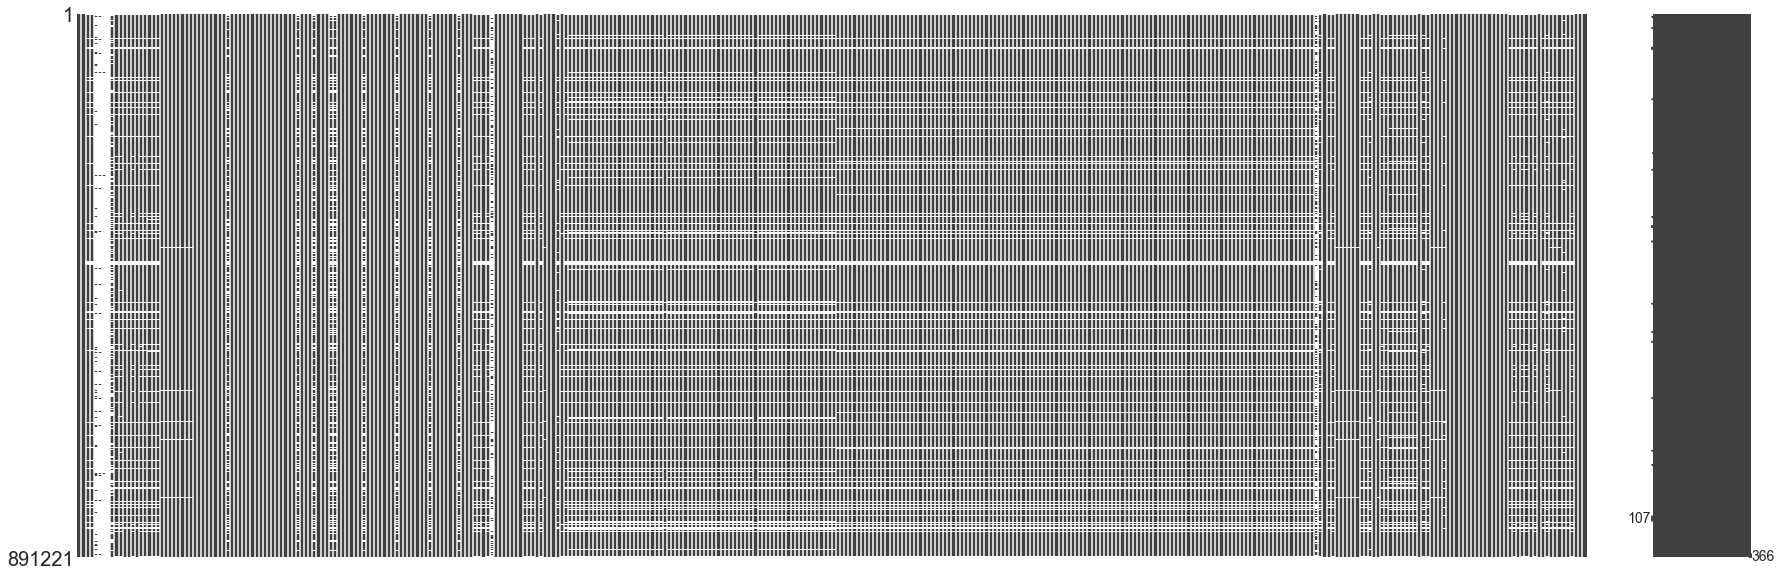

In [19]:
# Plot graphic of missing values
missingno.matrix(azdias, figsize = (30,10))

In [20]:
# Check for the extra columns in customer
customers_additional_features = set(customers.columns.tolist()) - set(azdias.columns.tolist())
print(customers_additional_features)
# store extra columns
customers_ex_cols = customers[customers_additional_features]
# drop extra columns
customers.drop(columns=customers_additional_features, axis=1, inplace=True)

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}


In [21]:
# Concat Two columns for plotting
azplot = azdias
cuplot = customers
azplot['dataset'] = 'Azdias'
cuplot['dataset'] = 'Customers'
df = pd.concat([azplot, cuplot])

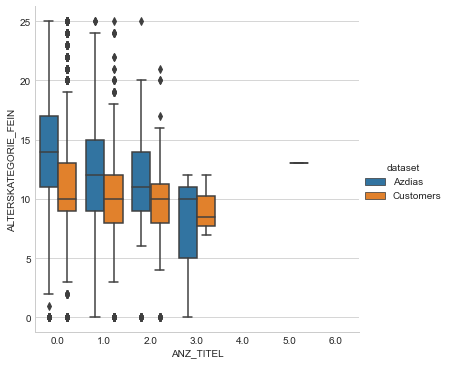

In [22]:

sns.catplot(x="ANZ_TITEL", y="ALTERSKATEGORIE_FEIN", hue="dataset",
            kind="box", dodge=True, data=df);

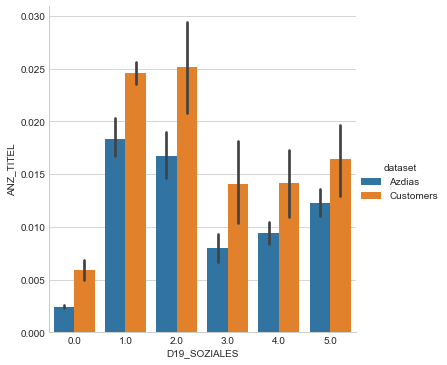

In [23]:
sns.catplot(x="D19_SOZIALES", y="ANZ_TITEL", hue="dataset", 
            kind="bar", data=df)

### Read info features 

In [24]:

feat_info = dias_xls
del feat_info['Unnamed: 0']
feat_info.head(15)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,0,no classification possible
2,NaN,NaN,1,passive elderly
3,NaN,NaN,2,cultural elderly
4,NaN,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,NaN,NaN,1,< 30 years
7,NaN,NaN,2,30 - 45 years
8,NaN,NaN,3,46 - 60 years
9,NaN,NaN,4,> 60 years


In [25]:
# It looks like the first 5 columns are for AGER_TYP (and so on) but only the first row of the
# attribute column is filled in and the rest are NaNs.  Therefore, forward-fill this column, redefine
# this as the attribute column, and view the first 10 lines of the altered dataframe. 
feat_info_attribute = feat_info['Attribute'].fillna(method='ffill')
feat_info['Attribute'] = feat_info_attribute
feat_info.head(10)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,NaN,0,no classification possible
2,AGER_TYP,NaN,1,passive elderly
3,AGER_TYP,NaN,2,cultural elderly
4,AGER_TYP,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,ALTERSKATEGORIE_GROB,NaN,1,< 30 years
7,ALTERSKATEGORIE_GROB,NaN,2,30 - 45 years
8,ALTERSKATEGORIE_GROB,NaN,3,46 - 60 years
9,ALTERSKATEGORIE_GROB,NaN,4,> 60 years


In [26]:
  
feat_info = feat_info[(feat_info['Meaning'].str.contains("unknown") | feat_info['Meaning'].str.contains("no "))]
pd.set_option('display.max_rows', 500)
feat_info

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,NaN,0,no classification possible
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
11,ALTER_HH,main age within the household,0,unknown / no main age detectable
33,ANREDE_KZ,gender,"-1, 0",unknown
40,BALLRAUM,distance to next urban centre,-1,unknown
48,BIP_FLAG,business-flag indicating companies in the buil...,-1,unknown
49,BIP_FLAG,NaN,0,no company in the building
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown
105,CAMEO_DEUINTL_2015,CAMEO classification 2015 - international typo...,-1,unknown


# 0.2 verify dataset

In [27]:

azdias    = load_data1_part0_1()       #DATA1
customers = load_data2_part0_2()       #DATA2

Read Original File: Udacity_AZDIAS_052018 


/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Read AZDIAS ORIGINAL OK!
Azdias shape - (891221, 366)
Read Original File: Udacity_CUSTOMERS_052018
Read CUSTOMERS ORIGINAL OK!
CUSTOMERS shape - (191652, 369)


In [28]:
print("Azdias shape -",azdias.shape)
print("Customers shape -",customers.shape)


Azdias shape - (891221, 366)
Customers shape - (191652, 369)


In [29]:
print("Number of columns in Customers Data - ", len(list(customers.columns)))
print("Number of columns in Azdius Data - ", len(list(azdias.columns)))

extra_cols_in_customers = [col for col in customers.columns if col not in azdias.columns]
print("Extra columns in Customers Data - ",extra_cols_in_customers)

Number of columns in Customers Data -  369
Number of columns in Azdius Data -  366
Extra columns in Customers Data -  ['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']


In [30]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [31]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


Extract how columns extra have betwen two dataframes

In [32]:
customers[extra_cols_in_customers].head()

,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE
0,COSMETIC_AND_FOOD,MULTI_BUYER,0
1,FOOD,SINGLE_BUYER,0
2,COSMETIC_AND_FOOD,MULTI_BUYER,0
3,COSMETIC,MULTI_BUYER,0
4,FOOD,MULTI_BUYER,0


These three columns have specific information about the customers and their buying behavior

In [33]:
### Fix this
attributes_values=  load_data6_info()      #DATA6

Read DIAS Attributes OK!
DIAS Attributes - (2258, 5)


In [34]:
attributes_values.shape

(2258, 5)

In [35]:
del attributes_values['Unnamed: 0']


In [36]:
attributes_values.head(15)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,NaN,NaN,0,no classification possible
2,NaN,NaN,1,passive elderly
3,NaN,NaN,2,cultural elderly
4,NaN,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,NaN,NaN,1,< 30 years
7,NaN,NaN,2,30 - 45 years
8,NaN,NaN,3,46 - 60 years
9,NaN,NaN,4,> 60 years


As seen above, each attribute has several lines corresponding to different values that the attribute can have. We can use the pandas ffill () method to fill in the nan values in the Attribute column to easily access all information about an attribute at once.

In [37]:
attributes_values["Attribute"] = attributes_values["Attribute"].ffill()
attributes_values.head(10)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,NaN,0,no classification possible
2,AGER_TYP,NaN,1,passive elderly
3,AGER_TYP,NaN,2,cultural elderly
4,AGER_TYP,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,ALTERSKATEGORIE_GROB,NaN,1,< 30 years
7,ALTERSKATEGORIE_GROB,NaN,2,30 - 45 years
8,ALTERSKATEGORIE_GROB,NaN,3,46 - 60 years
9,ALTERSKATEGORIE_GROB,NaN,4,> 60 years


In [38]:
attributes_info = load_data5_Atributos() #DATA5
del attributes_info['Unnamed: 0']

Read Original File: DIAS Information Levels 
DIAS Attributes Info - (313, 5)


In [39]:
attributes_info.head(15)

,Information level,Attribute,Description,Additional notes
0,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,ANREDE_KZ,gender,NaN
3,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...
5,NaN,FINANZ_SPARER,financial typology: money saver,NaN
6,NaN,FINANZ_VORSORGER,financial typology: be prepared,NaN
7,NaN,FINANZ_ANLEGER,financial typology: investor,NaN
8,NaN,FINANZ_UNAUFFAELLIGER,financial typology: unremarkable,NaN
9,NaN,FINANZ_HAUSBAUER,financial typology: main focus is the own house,NaN


# 0.3 Adjustment Dataset and warning 
##### Handling for the warnings in columns 18 and 20

In [40]:
## Warning message when the importa dataset azdias
##Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
## exec(code_obj, self.user_global_ns, self.user_ns)

print(azdias.columns[18:20])

warning_cols = list(azdias.columns[18:20])

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')


In [41]:
attributes_values[attributes_values["Attribute"] == "CAMEO_DEUG_2015"]

,Attribute,Description,Value,Meaning
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown
52,CAMEO_DEUG_2015,NaN,1,upper class
53,CAMEO_DEUG_2015,NaN,2,upper middleclass
54,CAMEO_DEUG_2015,NaN,3,established middleclasse
55,CAMEO_DEUG_2015,NaN,4,consumption-oriented middleclass
56,CAMEO_DEUG_2015,NaN,5,active middleclass
57,CAMEO_DEUG_2015,NaN,6,low-consumption middleclass
58,CAMEO_DEUG_2015,NaN,7,lower middleclass
59,CAMEO_DEUG_2015,NaN,8,working class
60,CAMEO_DEUG_2015,NaN,9,urban working class


In [42]:

# "CAMEO_INTL_2015" ---> named as "CAMEO_DEUINTL_2015" in attribute values excel sheet
attributes_values[attributes_values["Attribute"] == "CAMEO_DEUINTL_2015"]

,Attribute,Description,Value,Meaning
105,CAMEO_DEUINTL_2015,CAMEO classification 2015 - international typo...,-1,unknown
106,CAMEO_DEUINTL_2015,(each German CAMEO code belongs to one interna...,11,Wealthy Households-Pre-Family Couples & Singles
107,CAMEO_DEUINTL_2015,NaN,12,Wealthy Households-Young Couples With Children
108,CAMEO_DEUINTL_2015,NaN,13,Wealthy Households-Families With School Age Ch...
109,CAMEO_DEUINTL_2015,NaN,14,Wealthy Households-Older Families & Mature Co...
110,CAMEO_DEUINTL_2015,NaN,15,Wealthy Households-Elders In Retirement
111,CAMEO_DEUINTL_2015,NaN,21,Prosperous Households-Pre-Family Couples & Sin...
112,CAMEO_DEUINTL_2015,NaN,22,Prosperous Households-Young Couples With Children
113,CAMEO_DEUINTL_2015,NaN,23,Prosperous Households-Families With School Age...
114,CAMEO_DEUINTL_2015,NaN,24,Prosperous Households-Older Families & Mature ...


When we Looking at the two dataframes , we can see that these two columns must have values in the range provided in the "Value" column, that is, -1 for unknown values and integers for corresponding categories.

Does possible check into the datasets with unique ( ) what's happening with this column 

In [43]:
azdias[warning_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CAMEO_DEUG_2015  792242 non-null  object
 1   CAMEO_INTL_2015  792242 non-null  object
dtypes: object(2)
memory usage: 13.6+ MB


In [44]:
azdias[warning_cols[0]].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

In [45]:
azdias[warning_cols[1]].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
      dtype=object)

In [46]:
customers = load_data2_part0_2()       #DATA2

Read Original File: Udacity_CUSTOMERS_052018


/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Read CUSTOMERS ORIGINAL OK!
CUSTOMERS shape - (191652, 369)


In [47]:
customers[warning_cols[0]].unique()

array([1.0, nan, 5.0, 4.0, 7.0, 3.0, 9.0, 2.0, 6.0, 8.0, '6', '3', '8',
       '9', '2', '4', '1', '7', '5', 'X'], dtype=object)

In [48]:
customers[warning_cols[1]].unique()

array([13.0, nan, 34.0, 24.0, 41.0, 23.0, 15.0, 55.0, 14.0, 22.0, 43.0,
       51.0, 33.0, 25.0, 44.0, 54.0, 32.0, 12.0, 35.0, 31.0, 45.0, 52.0,
       '45', '25', '55', '51', '14', '54', '43', '22', '15', '24', '35',
       '23', '12', '44', '41', '52', '31', '13', '34', '32', '33', 'XX'],
      dtype=object)

#### investigating in these columns which values are unique and the types of values they contain

We have 'X' and 'XX' as values in these columns that were not provided in the description, there are also 'nan' values.

These values can be replaced by 'np.nan', because in the dataframe of the attributes it is described that any unknown values can be treated as' -1 ', but to make it more practical we will replace it with nan as well'.


All data that is a string or other type will be changed to float.

In [49]:
def fix_cameo_cols(df):
    """
    Function to replace 'X', 'XX' and 'nan' values with -1 in 
    columns 18 and 19 i.e. ['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'] 
    
    Also "CAMEO_DEU_2015", but it is dropped in later steps.
    """
    cols = ["CAMEO_DEUG_2015", "CAMEO_INTL_2015"]
    
    df[cols] = df[cols].replace({"X": np.nan, "XX": np.nan})
    df[cols] = df[cols].astype(float)
    
    return df

In [50]:
azdias = fix_cameo_cols(azdias)

In [51]:
azdias[warning_cols[1]].unique()

array([nan, 51., 24., 12., 43., 54., 22., 14., 13., 15., 33., 41., 34.,
       55., 25., 23., 31., 52., 35., 45., 44., 32.])

In [52]:
customers = fix_cameo_cols(customers)

In [53]:
customers[warning_cols[1]].unique()

array([13., nan, 34., 24., 41., 23., 15., 55., 14., 22., 43., 51., 33.,
       25., 44., 54., 32., 12., 35., 31., 45., 52.])

In [54]:
print(azdias.shape, customers.shape)

(891221, 366) (191652, 369)


As we can see now, we have no entries in these two columns. Although we have 'nan' values, which we will address in a later analysis.

# 0.5 Exploring attribute values
Let's explore what each column represents and understand a little more about the data.

For this, we will use the data_frame attribute_values, which was provided to complement the information about the project, as it contains all the column names and their descriptions with the corresponding values.

In [55]:
attributes_values.head(10)

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,NaN,0,no classification possible
2,AGER_TYP,NaN,1,passive elderly
3,AGER_TYP,NaN,2,cultural elderly
4,AGER_TYP,NaN,3,experience-driven elderly
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
6,ALTERSKATEGORIE_GROB,NaN,1,< 30 years
7,ALTERSKATEGORIE_GROB,NaN,2,30 - 45 years
8,ALTERSKATEGORIE_GROB,NaN,3,46 - 60 years
9,ALTERSKATEGORIE_GROB,NaN,4,> 60 years


### Description of the attribute information

Attribute - is the name of the column.

Description - contains a brief description of what this column represents.

Value - range of values that are recorded during data collection

Meaning - meaning of the corresponding value



We can take a look at all the attributes and their descriptions. This will help us to clear our data, replace all values that are unknown with np.nan as was done in the previous step with columns 18, 19.

In [56]:
attributes_values.dropna()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
11,ALTER_HH,main age within the household,0,unknown / no main age detectable
33,ANREDE_KZ,gender,"-1, 0",unknown
36,ANZ_HAUSHALTE_AKTIV,number of households in the building,…,numeric value (typically coded from 1-10)
37,ANZ_HH_TITEL,number of academic title holder in building,…,numeric value (typically coded from 1-10)
38,ANZ_PERSONEN,number of adult persons in the household,…,numeric value (typically coded from 1-3)
39,ANZ_TITEL,number of professional title holder in household,…,numeric value (typically coded from 1-10)
40,BALLRAUM,distance to next urban centre,-1,unknown
48,BIP_FLAG,business-flag indicating companies in the buil...,-1,unknown


#### Looking at the dataframes above, we can conclude that

Not all features have unknown values. Some of them have specified values and may not have nan values in the collected data. This means that resources without unknown values can be required fields on a form.

We can replace all unknown values with 'np.nan' values.


In [57]:
attributes_list  = attributes_values.Attribute.unique().tolist()
azdias_list = list(azdias.columns)
customers_list = list(customers.columns)

In [58]:
common_to_all = (set(attributes_list) & set(azdias_list) & set(customers_list))
unique_to_azdias = (set(azdias_list) - set(attributes_list) - set(customers_list))
unique_to_customers = (set(customers_list) - set(attributes_list) - set(azdias_list))
unique_to_attributes = (set(attributes_list) - set(customers_list) - set(azdias_list))
unique_to_attributes_vs_azdias = (set(attributes_list) - set(azdias_list))
unique_to_azdias_vs_attributes = (set(attributes_list) - set(azdias_list))
common_azdias_attributes = (set(azdias_list) & set(attributes_list))

print("No of columns common to all 3 daframes: ", str(len(common_to_all)))
print("No of columns specific to azdias: " + str(len(unique_to_azdias)))
print("No of columns specific to customers: " + str(len(unique_to_customers)))
print("No of columns specific to attributes: " + str(len(unique_to_attributes)))
print("No of columns common between azdias and attributes: " + str(len(common_azdias_attributes)))
print("No of columns exclusive to attributes vs azdias: " + str(len(unique_to_attributes_vs_azdias)))
print("No of columns exclusive to azdias vs attributes: " + str(len(unique_to_azdias_vs_attributes)))

No of columns common to all 3 daframes:  272
No of columns specific to azdias: 0
No of columns specific to customers: 3
No of columns specific to attributes: 42
No of columns common between azdias and attributes: 272
No of columns exclusive to attributes vs azdias: 42
No of columns exclusive to azdias vs attributes: 42


We have 42 exclusive columns provided in the attribute_values ​​that are not present in the customer's data or data.

We have 3 specific values ​​in the costumers that have already been mentioned in the analysis in the previous steps.

This may be due to errors in the registration of these columns. We can go further by correcting these errors and analyzing the reason behind these missing columns.

But, for this analysis, we will consider only the 272 columns that are common to all three data frames to replace the 'unknown' values.

## 0.6 Data cleaning and resource engineering
From this point on we will clean the data, going through the columns and observing what values they have and cleaning them to have values consistent with the analysis.


Let's start with the columns:

- LP_FAMILIE_ *,

- LP_FAMILIE_ *,

- LP_LEBENSPHASE_ *,

- LP_STATUS_GROB

- LP_LEBENSPHASE_GROB

- LP_LEBENSPHASE_FEIN

- LP_STATUS_FEIN

because they have some strange values that were not specified in the attribute description.

In [59]:
print(azdias.LP_FAMILIE_FEIN.unique())

print(azdias.LP_FAMILIE_GROB.unique())

print(azdias.LP_STATUS_GROB.unique())

print(azdias.LP_LEBENSPHASE_GROB.unique())

print(azdias.LP_LEBENSPHASE_FEIN.unique())

print(azdias.LP_STATUS_FEIN.unique())

[ 2.  5.  1.  0. 10.  7. 11.  3.  8.  4.  6. nan  9.]
[ 2.  3.  1.  0.  5.  4. nan]
[ 1.  2.  4.  5.  3. nan]
[ 4.  6.  1.  0. 10.  2.  3.  5.  7. 12. 11.  9.  8. nan]
[15. 21.  3.  0. 32.  8.  2.  5. 10.  4.  6. 23. 12. 20.  1. 11. 25. 13.
  7. 18. 31. 19. 38. 35. 30. 22. 14. 33. 29. 24. 28. 37. 26. 39. 27. 36.
  9. 34. nan 40. 16. 17.]
[ 1.  2.  3.  9.  4. 10.  5.  8.  6.  7. nan]


The columns:
- LP_FAMILIE_FEIN,
- LP_FAMILIE_GROB,
- LP_LEBENSPHASE_GROB
contains 0 as an entry that does not correspond to any category according to the value information provided in Attributes DIAS - Values ​​2017.xlsx. For this reason, any value 0 in these columns can be converted to nan.


In these columns there is information that can be compressed, which is done in the next step.

- LP_FAMILIE_FEIN
- LP_STATUS_FEIN
provide an excellent categorization of family type and family status. The same information in a broader spectrum is provided by LP_FAMILIE_GROB and LP_STATUS_GROB.

For this reason, for this analysis, the columns will be removed from the dataset
- LP_FAMILIE_FEIN
- LP_STATUS_FEIN


- LP_LEBENSPHASE_GROB
It provides a general description of the person's stage of life in relation to age and wealth and

- LP_LEBENSPHASE_FEIN
Provides a good quality rating of the person's age and financial status. Which means that these two columns are representing the same information twice.

- LP_LEBENSPHASE_GROB,
- LP_LEBENSPHASE_FEIN

It provides information about age and the other contains information about wealth.

In [60]:
def fix_LP_cols(df):
    """
    Function to replace 0s with nan values columns,
    ["LP_FAMILIE_FEIN", "LP_FAMILIE_GROB", "LP_LEBENSPHASE_FEIN",
           "LP_LEBENSPHASE_GROB", "LP_STATUS_FEIN", "LP_STATUS_GROB"]
    """
    
    # Replacing '0' with NaNs
    cols = ["LP_FAMILIE_FEIN", "LP_FAMILIE_GROB", "LP_LEBENSPHASE_FEIN",
           "LP_LEBENSPHASE_GROB", "LP_STATUS_FEIN", "LP_STATUS_GROB"]
    
    df[cols] = df[cols].replace({0: np.nan})
    df[cols] = df[cols].astype(float)
    
    
    
    # LP_FAMILIE_GROB
    convert_1 = {1: 'single', 2: 'couple', 3: 'singleparent', 4: 'singleparent', 5: 'singleparent', 
                  6: 'family', 7: 'family', 8: 'family', 9: 'multihousehold', 10: 'multihousehold', 11: 'multihousehold'}
    convert_2 = {'single':0, 'couple':1, 'singleparent':2, 'family':3, 'multihousehold':4}
    
    df["LP_FAMILIE_GROB"] = df["LP_FAMILIE_GROB"].map(convert_1)
    df["LP_FAMILIE_GROB"] = df["LP_FAMILIE_GROB"].map(convert_2)
    
    # LP_STATUS_GROB    
    convert_1 = {1: 'lowincome', 2: 'lowincome', 3: 'avgincome', 4: 'avgincome', 5: 'avgincome', 
                  6: 'independant', 7: 'independant', 8: 'houseowner', 9: 'houseowner', 10: 'topearner'}
    convert_2 = {'lowincome':0, 'avgincome':1, 'independant':2, 'houseowner':3, 'topearner':4}
    
    df["LP_STATUS_GROB"] = df["LP_STATUS_GROB"].map(convert_1)
    df["LP_STATUS_GROB"] = df["LP_STATUS_GROB"].map(convert_2)
    
    
    # LP_LEBENSPHASE_FEIN
    life_stages = {1: 'younger_age', 2: 'middle_age', 3: 'younger_age',
              4: 'middle_age', 5: 'advanced_age', 6: 'retirement_age',
              7: 'advanced_age', 8: 'retirement_age', 9: 'middle_age',
              10: 'middle_age', 11: 'advanced_age', 12: 'retirement_age',
              13: 'advanced_age', 14: 'younger_age', 15: 'advanced_age',
              16: 'advanced_age', 17: 'middle_age', 18: 'younger_age',
              19: 'advanced_age', 20: 'advanced_age', 21: 'middle_age',
              22: 'middle_age', 23: 'middle_age', 24: 'middle_age',
              25: 'middle_age', 26: 'middle_age', 27: 'middle_age',
              28: 'middle_age', 29: 'younger_age', 30: 'younger_age',
              31: 'advanced_age', 32: 'advanced_age', 33: 'younger_age',
              34: 'younger_age', 35: 'younger_age', 36: 'advanced_age',
              37: 'advanced_age', 38: 'retirement_age', 39: 'middle_age',
              40: 'retirement_age'}

    wealth_scale = {1: 'low', 2: 'low', 3: 'average', 4: 'average', 5: 'low', 6: 'low',
              7: 'average', 8: 'average', 9: 'average', 10: 'wealthy', 11: 'average',
              12: 'average', 13: 'top', 14: 'average', 15: 'low', 16: 'average',
              17: 'average', 18: 'wealthy', 19: 'wealthy', 20: 'top', 21: 'low',
              22: 'average', 23: 'wealthy', 24: 'low', 25: 'average', 26: 'average',
              27: 'average', 28: 'top', 29: 'low', 30: 'average', 31: 'low',
              32: 'average', 33: 'average', 34: 'average', 35: 'top', 36: 'average',
              37: 'average', 38: 'average', 39: 'top', 40: 'top'}
    
    df["Temp"] = df["LP_LEBENSPHASE_FEIN"]
    
    df["LP_LEBENSPHASE_FEIN"] = df["LP_LEBENSPHASE_FEIN"].map(life_stages)
    df["LP_LEBENSPHASE_GROB"] = df["Temp"].map(wealth_scale)
    
    life_stages = {'younger_age': 1, 'middle_age': 2, 'advanced_age': 3,
            'retirement_age': 4}
    wealth_scale = {'low': 1, 'average': 2, 'wealthy': 3, 'top': 4}
    
    df["LP_LEBENSPHASE_FEIN"] = df["LP_LEBENSPHASE_FEIN"].map(life_stages)
    df["LP_LEBENSPHASE_GROB"] = df["LP_LEBENSPHASE_GROB"].map(wealth_scale)
        

    return df

In [61]:
customers = fix_LP_cols(customers)
azdias = fix_LP_cols(azdias)

In [62]:
print(azdias.LP_FAMILIE_FEIN.unique())

print(azdias.LP_FAMILIE_GROB.unique())

print(azdias.LP_STATUS_GROB.unique())

print(azdias.LP_LEBENSPHASE_GROB.unique())

print(azdias.LP_LEBENSPHASE_FEIN.unique())

print(azdias.LP_STATUS_FEIN.unique())

[ 2.  5.  1. nan 10.  7. 11.  3.  8.  4.  6.  9.]
[ 1.  2.  0. nan]
[ 0.  1. nan]
[ 1.  2. nan  3.  4.]
[ 3.  2.  1. nan  4.]
[ 1.  2.  3.  9.  4. 10.  5.  8.  6.  7. nan]


In [63]:
azdias.isnull().sum()

LNR                                 0
AGER_TYP                            0
AKT_DAT_KL                      73499
ALTER_HH                        73499
ALTER_KIND1                    810163
ALTER_KIND2                    861722
ALTER_KIND3                    885051
ALTER_KIND4                    890016
ALTERSKATEGORIE_FEIN           262947
ANZ_HAUSHALTE_AKTIV             93148
ANZ_HH_TITEL                    97008
ANZ_KINDER                      73499
ANZ_PERSONEN                    73499
ANZ_STATISTISCHE_HAUSHALTE      93148
ANZ_TITEL                       73499
ARBEIT                          97216
BALLRAUM                        93740
CAMEO_DEU_2015                  98979
CAMEO_DEUG_2015                 99352
CAMEO_INTL_2015                 99352
CJT_GESAMTTYP                    4854
CJT_KATALOGNUTZER                4854
CJT_TYP_1                        4854
CJT_TYP_2                        4854
CJT_TYP_3                        4854
CJT_TYP_4                        4854
CJT_TYP_5   

The EINGEFUEGT_AM column appears to inform you of the date the entry was made. We will convert it to a datetime object to see its distribution and try to get some information that helps in the analysis.

In [64]:
def fix_eigefugt_col(df):
    
    df["EINGEFUEGT_AM"] = pd.to_datetime(df["EINGEFUEGT_AM"])
    df["EINGEFUEGT_AM"] = df['EINGEFUEGT_AM'].map(lambda x: x.year)
    
    return df

In [65]:
customers = fix_eigefugt_col(customers)
azdias = fix_eigefugt_col(azdias)


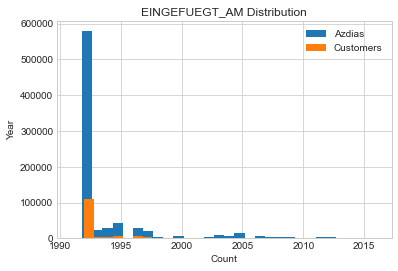

In [66]:
plt.hist(azdias["EINGEFUEGT_AM"], bins=30, label="Azdias")
plt.hist(customers["EINGEFUEGT_AM"], bins=30, label="Customers")
plt.ylabel("Year")
plt.xlabel("Count")
plt.title("EINGEFUEGT_AM Distribution")
plt.legend()
plt.show()

Interestingly, it appears that the distributions are almost similar. It is possible to observe that the customers in these data have greater activities before 1995, according to the graph.

### Dealing with Unknown Values

We can also analyze and change other categorical columns after ensuring that all unknown values are replaced with NaNs in the data frames.


From the information provided in the attribute values dataframe, some columns have unknown values registered with specific representations.

These unknown representations can be obtained by the following steps. We can use these representations later to change them to NaN values, treating them as missing entries

In [67]:
unkown_attributes_values = attributes_values[attributes_values["Meaning"] == "unknown"]
print(len(unkown_attributes_values))

232


Temos 232 colunas com valores desconhecidos, que são exibidos abaixo. Esses valores nas colunas precisam ser substituídos por valores NaN.

In [68]:
unkown_attributes_values

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
33,ANREDE_KZ,gender,"-1, 0",unknown
40,BALLRAUM,distance to next urban centre,-1,unknown
48,BIP_FLAG,business-flag indicating companies in the buil...,-1,unknown
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown
105,CAMEO_DEUINTL_2015,CAMEO classification 2015 - international typo...,-1,unknown
131,CJT_GESAMTTYP,customer journey typology,0,unknown
391,D19_KK_KUNDENTYP,consumption movement in the last 12 months,-1,unknown
647,EWDICHTE,density of inhabitants per square kilometer,-1,unknown


In [69]:
def get_unkown_repr(attrib, unkown_attributes_values):
    """Returns the representation of unkown values"""
    
    unkown = unkown_attributes_values[unkown_attributes_values["Attribute"] == attrib]["Value"]
    unkown = unkown.astype(str).str.cat(sep=",")
    unkown = [int(x) for x in unkown.split(",")]
      
    return [unkown]

In [70]:
ager_typ_unkwon = get_unkown_repr("AGER_TYP", unkown_attributes_values)

print(ager_typ_unkwon)

[[-1]]


looking at dataframe azdias before replacing all 'unknown' values.

In [73]:
azdias.head(15)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,Temp
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,15.0
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1,21.0
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3,3.0
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4,NaN
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3,32.0
5,910244,3,1.0,10.0,NaN,NaN,NaN,NaN,10.0,5.0,...,10.0,7.0,4.0,6.0,9.0,7.0,4,2,1,8.0
6,910248,-1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,...,7.0,10.0,10.0,3.0,9.0,5.0,4,2,2,2.0
7,910261,-1,1.0,14.0,NaN,NaN,NaN,NaN,14.0,6.0,...,10.0,12.0,9.0,5.0,9.0,1.0,1,1,1,5.0
8,645145,-1,9.0,16.0,NaN,NaN,NaN,NaN,16.0,2.0,...,8.0,11.0,8.0,5.0,8.0,1.0,6,1,3,10.0
9,645153,-1,5.0,17.0,NaN,NaN,NaN,NaN,17.0,9.0,...,1.0,1.0,1.0,4.0,3.0,7.0,4,2,3,4.0


Looking at the second column AGER_TYP, there are many -1s that according to the spreadsheet Dias Attributes Values.xlsx, correspond to unknown values. Let's take the action of replacing these -1 values with Nan

In [74]:
def replace_unkown_with_nan(val, unkown):
    """Replaces unkown values with np.nan values if the value mathes with the unkown representation"""
    if val in unkown:
        return np.nan
    else:
        return val

In [75]:
azdias["AGER_TYP"] = azdias["AGER_TYP"].apply(replace_unkown_with_nan, args=(ager_typ_unkwon))


In [76]:
azdias.head(15)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,Temp
0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,15.0
1,910220,NaN,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1,21.0
2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3,3.0
3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4,NaN
4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3,32.0
5,910244,3.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,5.0,...,10.0,7.0,4.0,6.0,9.0,7.0,4,2,1,8.0
6,910248,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,...,7.0,10.0,10.0,3.0,9.0,5.0,4,2,2,2.0
7,910261,NaN,1.0,14.0,NaN,NaN,NaN,NaN,14.0,6.0,...,10.0,12.0,9.0,5.0,9.0,1.0,1,1,1,5.0
8,645145,NaN,9.0,16.0,NaN,NaN,NaN,NaN,16.0,2.0,...,8.0,11.0,8.0,5.0,8.0,1.0,6,1,3,10.0
9,645153,NaN,5.0,17.0,NaN,NaN,NaN,NaN,17.0,9.0,...,1.0,1.0,1.0,4.0,3.0,7.0,4,2,3,4.0


let's repeat the same thing for all 232 columns with unknown values.

In [77]:
def replace_unkowns(df, unkown_attributes_values, verbose=False):
    """
    Replaces unkown values to 'np.nan' in all the columns provided in unkown_attributes_values list.
    """
    for attrib in unkown_attributes_values.Attribute:
        unkown = get_unkown_repr(attrib, unkown_attributes_values)
        if verbose:
            print("Replacing {} to NaN in Attribute {}".format(unkown, attrib))
        if attrib in df.columns:
            df[attrib] = df[attrib].apply(replace_unkown_with_nan, args=(unkown))
    return df

In [78]:
azdias = replace_unkowns(azdias, unkown_attributes_values, verbose=True)

Replacing [[-1]] to NaN in Attribute AGER_TYP
Replacing [[-1, 0]] to NaN in Attribute ALTERSKATEGORIE_GROB
Replacing [[-1, 0]] to NaN in Attribute ANREDE_KZ
Replacing [[-1]] to NaN in Attribute BALLRAUM
Replacing [[-1]] to NaN in Attribute BIP_FLAG
Replacing [[-1]] to NaN in Attribute CAMEO_DEUG_2015
Replacing [[-1]] to NaN in Attribute CAMEO_DEUINTL_2015
Replacing [[0]] to NaN in Attribute CJT_GESAMTTYP
Replacing [[-1]] to NaN in Attribute D19_KK_KUNDENTYP
Replacing [[-1]] to NaN in Attribute EWDICHTE
Replacing [[-1]] to NaN in Attribute FINANZTYP
Replacing [[-1]] to NaN in Attribute FINANZ_ANLEGER
Replacing [[-1]] to NaN in Attribute FINANZ_HAUSBAUER
Replacing [[-1]] to NaN in Attribute FINANZ_MINIMALIST
Replacing [[-1]] to NaN in Attribute FINANZ_SPARER
Replacing [[-1]] to NaN in Attribute FINANZ_UNAUFFAELLIGER
Replacing [[-1]] to NaN in Attribute FINANZ_VORSORGER
Replacing [[-1, 0]] to NaN in Attribute GEBAEUDETYP
Replacing [[-1, 0]] to NaN in Attribute GEOSCORE_KLS7
Replacing [[-1

Replacing [[-1]] to NaN in Attribute KBA13_KW_70
Replacing [[-1]] to NaN in Attribute KBA13_KW_61_120
Replacing [[-1]] to NaN in Attribute KBA13_KW_80
Replacing [[-1]] to NaN in Attribute KBA13_KW_90
Replacing [[-1]] to NaN in Attribute KBA13_KW_110
Replacing [[-1]] to NaN in Attribute KBA13_KW_120
Replacing [[-1]] to NaN in Attribute KBA13_KW_121
Replacing [[-1]] to NaN in Attribute KBA13_MAZDA
Replacing [[-1]] to NaN in Attribute KBA13_MERCEDES
Replacing [[-1]] to NaN in Attribute KBA13_MOTOR
Replacing [[-1]] to NaN in Attribute KBA13_NISSAN
Replacing [[-1]] to NaN in Attribute KBA13_OPEL
Replacing [[-1]] to NaN in Attribute KBA13_PEUGEOT
Replacing [[-1]] to NaN in Attribute KBA13_RENAULT
Replacing [[-1]] to NaN in Attribute KBA13_SEG_GELAENDEWAGEN
Replacing [[-1]] to NaN in Attribute KBA13_SEG_GROSSRAUMVANS
Replacing [[-1]] to NaN in Attribute KBA13_SEG_KLEINST
Replacing [[-1]] to NaN in Attribute KBA13_SEG_KLEINWAGEN
Replacing [[-1]] to NaN in Attribute KBA13_SEG_KOMPAKTKLASSE
Repl

In [79]:
customers = replace_unkowns(customers, unkown_attributes_values, verbose=True)

Replacing [[-1]] to NaN in Attribute AGER_TYP
Replacing [[-1, 0]] to NaN in Attribute ALTERSKATEGORIE_GROB
Replacing [[-1, 0]] to NaN in Attribute ANREDE_KZ
Replacing [[-1]] to NaN in Attribute BALLRAUM
Replacing [[-1]] to NaN in Attribute BIP_FLAG
Replacing [[-1]] to NaN in Attribute CAMEO_DEUG_2015
Replacing [[-1]] to NaN in Attribute CAMEO_DEUINTL_2015
Replacing [[0]] to NaN in Attribute CJT_GESAMTTYP
Replacing [[-1]] to NaN in Attribute D19_KK_KUNDENTYP
Replacing [[-1]] to NaN in Attribute EWDICHTE
Replacing [[-1]] to NaN in Attribute FINANZTYP
Replacing [[-1]] to NaN in Attribute FINANZ_ANLEGER
Replacing [[-1]] to NaN in Attribute FINANZ_HAUSBAUER
Replacing [[-1]] to NaN in Attribute FINANZ_MINIMALIST
Replacing [[-1]] to NaN in Attribute FINANZ_SPARER
Replacing [[-1]] to NaN in Attribute FINANZ_UNAUFFAELLIGER
Replacing [[-1]] to NaN in Attribute FINANZ_VORSORGER
Replacing [[-1, 0]] to NaN in Attribute GEBAEUDETYP
Replacing [[-1, 0]] to NaN in Attribute GEOSCORE_KLS7
Replacing [[-1

Replacing [[-1]] to NaN in Attribute KBA13_KW_70
Replacing [[-1]] to NaN in Attribute KBA13_KW_61_120
Replacing [[-1]] to NaN in Attribute KBA13_KW_80
Replacing [[-1]] to NaN in Attribute KBA13_KW_90
Replacing [[-1]] to NaN in Attribute KBA13_KW_110
Replacing [[-1]] to NaN in Attribute KBA13_KW_120
Replacing [[-1]] to NaN in Attribute KBA13_KW_121
Replacing [[-1]] to NaN in Attribute KBA13_MAZDA
Replacing [[-1]] to NaN in Attribute KBA13_MERCEDES
Replacing [[-1]] to NaN in Attribute KBA13_MOTOR
Replacing [[-1]] to NaN in Attribute KBA13_NISSAN
Replacing [[-1]] to NaN in Attribute KBA13_OPEL
Replacing [[-1]] to NaN in Attribute KBA13_PEUGEOT
Replacing [[-1]] to NaN in Attribute KBA13_RENAULT
Replacing [[-1]] to NaN in Attribute KBA13_SEG_GELAENDEWAGEN
Replacing [[-1]] to NaN in Attribute KBA13_SEG_GROSSRAUMVANS
Replacing [[-1]] to NaN in Attribute KBA13_SEG_KLEINST
Replacing [[-1]] to NaN in Attribute KBA13_SEG_KLEINWAGEN
Replacing [[-1]] to NaN in Attribute KBA13_SEG_KOMPAKTKLASSE
Repl

In [80]:
azdias.isnull().sum()

LNR                                 0
AGER_TYP                       677503
AKT_DAT_KL                      73499
ALTER_HH                        73499
ALTER_KIND1                    810163
ALTER_KIND2                    861722
ALTER_KIND3                    885051
ALTER_KIND4                    890016
ALTERSKATEGORIE_FEIN           262947
ANZ_HAUSHALTE_AKTIV             93148
ANZ_HH_TITEL                    97008
ANZ_KINDER                      73499
ANZ_PERSONEN                    73499
ANZ_STATISTISCHE_HAUSHALTE      93148
ANZ_TITEL                       73499
ARBEIT                          97216
BALLRAUM                        93740
CAMEO_DEU_2015                  98979
CAMEO_DEUG_2015                 99352
CAMEO_INTL_2015                 99352
CJT_GESAMTTYP                    4854
CJT_KATALOGNUTZER                4854
CJT_TYP_1                        4854
CJT_TYP_2                        4854
CJT_TYP_3                        4854
CJT_TYP_4                        4854
CJT_TYP_5   

## 0.7 Missing values
Now that we've replaced all the unknowns with np.nans, we can see how many missing values each column contains and decide whether to keep a column for later analysis

In [81]:
# Perform an assessment of how much missing data there is in each column of the
# dataset: azdias.
col_na = azdias.shape[0] - azdias.count()
col_na.sort_values()

LNR                                 0
D19_VERSAND_ONLINE_DATUM            0
D19_VERSAND_OFFLINE_DATUM           0
D19_VERSAND_DATUM                   0
D19_VERSAND_ANZ_24                  0
D19_VERSAND_ANZ_12                  0
D19_TIERARTIKEL                     0
D19_TELKO_REST                      0
SEMIO_REL                           0
D19_TELKO_ONLINE_DATUM              0
D19_TELKO_OFFLINE_DATUM             0
D19_TELKO_MOBILE                    0
D19_TELKO_DATUM                     0
ALTERSKATEGORIE_GROB                0
D19_TELKO_ANZ_12                    0
D19_TECHNIK                         0
SEMIO_SOZ                           0
D19_SONSTIGE                        0
D19_SCHUHE                          0
D19_SAMMELARTIKEL                   0
D19_REISEN                          0
D19_RATGEBER                        0
D19_NAHRUNGSERGAENZUNG              0
SEMIO_TRADV                         0
SEMIO_VERT                          0
D19_LEBENSMITTEL                    0
SEMIO_RAT   

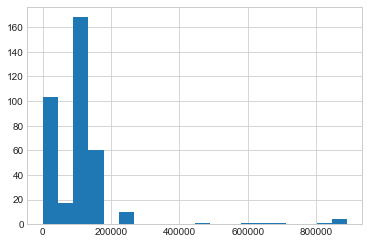

In [82]:

# Investigate patterns in the amount of missing data in each column.
col_na.hist(bins=20);

In [83]:
col_na = customers.shape[0] - customers.count()
col_na.sort_values()

LNR                                 0
D19_VERSI_DATUM                     0
D19_VERSI_ANZ_24                    0
D19_VERSI_ANZ_12                    0
D19_VERSAND_REST                    0
D19_VERSAND_ONLINE_DATUM            0
D19_VERSAND_OFFLINE_DATUM           0
D19_VERSAND_ANZ_24                  0
D19_VERSAND_ANZ_12                  0
D19_TIERARTIKEL                     0
D19_TELKO_REST                      0
D19_TELKO_ONLINE_DATUM              0
D19_VERSI_OFFLINE_DATUM             0
D19_TELKO_OFFLINE_DATUM             0
D19_TELKO_DATUM                     0
D19_TELKO_ANZ_24                    0
D19_TELKO_ANZ_12                    0
D19_TECHNIK                         0
D19_SONSTIGE                        0
D19_SCHUHE                          0
D19_SAMMELARTIKEL                   0
D19_REISEN                          0
D19_RATGEBER                        0
D19_NAHRUNGSERGAENZUNG              0
D19_LEBENSMITTEL                    0
D19_TELKO_MOBILE                    0
D19_VERSI_ON

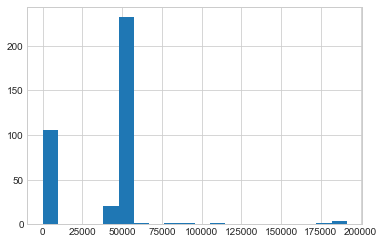

In [84]:

# Investigate patterns in the amount of missing data in each column.
col_na.hist(bins=20);

In [85]:
def get_missing_report(df):
    """
    Takes in a dataframe and returns a dataframe with information about column-wise missing values percentages.
    """
    missing_percen = df.isna().sum() * 100/ len(df)
    
    missing_percen_df = pd.DataFrame({"Attribute": df.columns,
                                     "Missing_Percentage": missing_percen}).reset_index(drop=True)
    return missing_percen_df

In [86]:
customer_missing_report = get_missing_report(customers)
azdias_missing_report = get_missing_report(azdias)

In [87]:
print("Total No of columns in Customers - ", len(customers.columns))
print("No of columns with missing values in customers - ",
      len(customer_missing_report[customer_missing_report.Missing_Percentage > 0]))

print("Total No of columns in Azdias - ", len(azdias.columns))
print("No of columns with missing values in azdias - ",
      len(azdias_missing_report[azdias_missing_report.Missing_Percentage > 0]))

Total No of columns in Customers -  370
No of columns with missing values in customers -  280
Total No of columns in Azdias -  367
No of columns with missing values in azdias -  280


In [88]:
def plot_percentage_missing(df1, df2, percentage=0, figsize=(10,70)):
    """
    Takes in two dataframes and plots a barchart comparing two dataframes
    features and percentage of missing values based on a threshold percentage given
    """
    fig = plt.figure(figsize=figsize)

    fig.suptitle("Missing Data percentages")

    ax = fig.add_subplot(121)
    ax.set_title("Azdias")
    sns.barplot(y="Attribute", x="Missing_Percentage", 
                data=df1[df1.Missing_Percentage>percentage], ax= ax)

    ax = fig.add_subplot(122)
    ax.set_title("Customer")
    sns.barplot(y="Attribute", x="Missing_Percentage", 
                data=df2[df2.Missing_Percentage>percentage], ax= ax)

    fig.tight_layout(rect=[0, 0.03, 1, 0.975])
    # fig.tight_layout()
    plt.show()

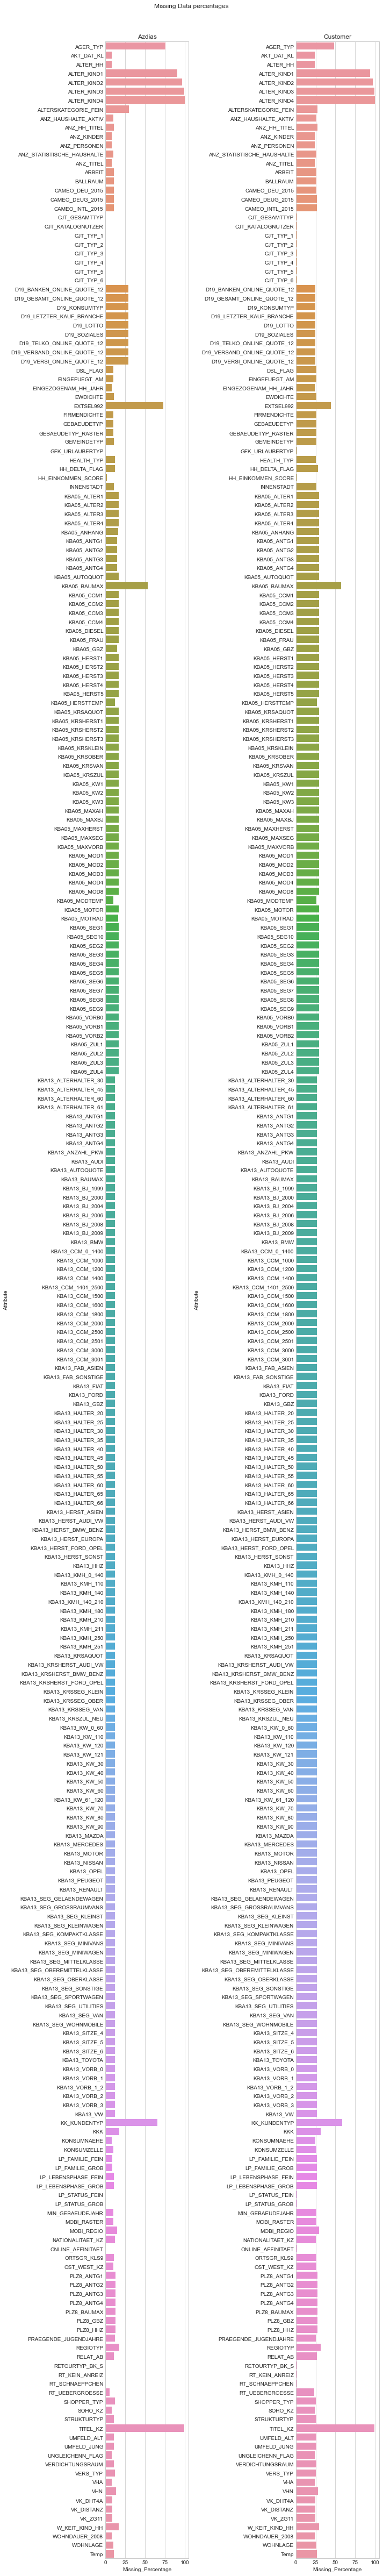

In [89]:
plot_percentage_missing(azdias_missing_report, customer_missing_report, percentage=0)

Looking at the graph above, we can conclude that percentage of data is missing from each column where we have missing data.

There is overlap in the data of Azdias and customers, that is, data is missing in the same columns. In addition, the percentage of missing values in Azdias and Customers coincides a lot, which confirms that customer data is a subset of azdias data.

We can limit the missing percentage and see how many columns have a percentage of lost data greater than the limit.

According to the graphs we can see that 30 can represent a good result

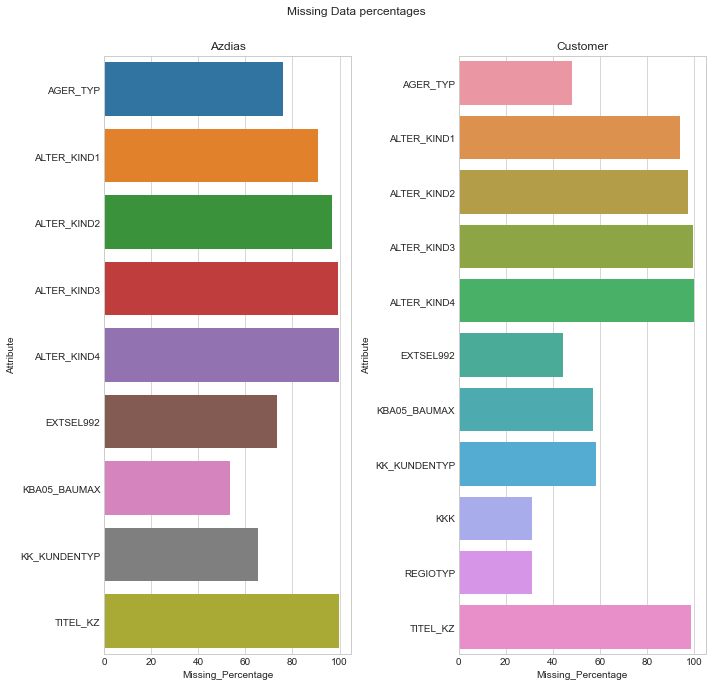

In [90]:
plot_percentage_missing(azdias_missing_report, customer_missing_report, percentage=30, figsize=(10, 10))

There are 11 resources with more than 30% of missing values in the customer data, while in Azdias data we have only 9 resources.

Considering that, in total, we had 279 columns with missing values in both dataframes.

We will remove the resources with more than 30% of the data from the customer data, also the same resources have to be removed from the Azdias data.

In [91]:
def remove_columns(df, remove_cols):
    """
    Drops given list of columns from df.
    """
    df = df.drop(remove_cols, axis = 1)
    return df

def remove_missing_columns(df1, df2, df1_missing, df2_missing, threshold=30):
    """
    Drops columns from df1 and df2 with given threshold.
    
    Uses df1_missing and df2_missing to determing which columns to remove.
    If df1_missing has more missing columns (missing_percentage > threshold),
    then df1_missing is taken as reference and vice versa.
    """
    
    removable_cols1 = df1_missing[df1_missing.Missing_Percentage > threshold]
    removable_cols2 = df2_missing[df2_missing.Missing_Percentage > threshold]
    
    if len(removable_cols1) > len(removable_cols2):
        remove_cols = removable_cols1.Attribute.tolist()
    else:
        remove_cols = removable_cols2.Attribute.tolist()
         
    df1 = remove_columns(df1, remove_cols)
    df2 = remove_columns(df2, remove_cols)
    print(f"\t\tRemoved {len(remove_cols)} columns from given dataframes")
    
    return (df1, df2, remove_cols)

In [92]:
print("Number of columns Before dropping")
print(f"Azdias - {len(azdias.columns)}")
print(f"Customers - {len(customers.columns)}")

azdias, customers, removed_cols = remove_missing_columns(azdias, customers, customer_missing_report, azdias_missing_report)

print("Number of columns After dropping")
print(f"Azdias - {len(azdias.columns)}")
print(f"Customers - {len(customers.columns)}")

Number of columns Before dropping
Azdias - 367
Customers - 370
		Removed 11 columns from given dataframes
Number of columns After dropping
Azdias - 356
Customers - 359


In [93]:
azdias.isnull().sum()

LNR                                 0
AKT_DAT_KL                      73499
ALTER_HH                        73499
ALTERSKATEGORIE_FEIN           262947
ANZ_HAUSHALTE_AKTIV             93148
ANZ_HH_TITEL                    97008
ANZ_KINDER                      73499
ANZ_PERSONEN                    73499
ANZ_STATISTISCHE_HAUSHALTE      93148
ANZ_TITEL                       73499
ARBEIT                          97216
BALLRAUM                        93740
CAMEO_DEU_2015                  98979
CAMEO_DEUG_2015                 99352
CAMEO_INTL_2015                 99352
CJT_GESAMTTYP                    4854
CJT_KATALOGNUTZER                4854
CJT_TYP_1                        4854
CJT_TYP_2                        4854
CJT_TYP_3                        4854
CJT_TYP_4                        4854
CJT_TYP_5                        4854
CJT_TYP_6                        4854
D19_BANKEN_ANZ_12                   0
D19_BANKEN_ANZ_24                   0
D19_BANKEN_DATUM                    0
D19_BANKEN_D

# 0.8 Missing values in rows
After removing columns that have more than 30% of missing values, we can now examine dataframes with remaining resources for any missing values in the rows.

In [94]:
def plot_missing_rowwise_histogram(df1, df2, bins=30, figsize=(10,6)):
    """
    Takes in two dataframes and plots a barchart comparing two dataframes
    rows and percentage of missing values based on a threshold percentage given
    """
    bins = 30
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot(111)
    ax.set_title("No. of Rows vs No. of Missing features")
    ax.set_xlabel("No. of Missing Features")
    ax.set_ylabel("No. of Rows")
    sns.distplot(df1.isnull().sum(axis=1), bins, kde=False, ax=ax, label="Azdias")
    sns.distplot(df2.isnull().sum(axis=1), bins, kde=False, ax=ax, label="Customers")
    ax.legend()
    
    plt.show()

/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


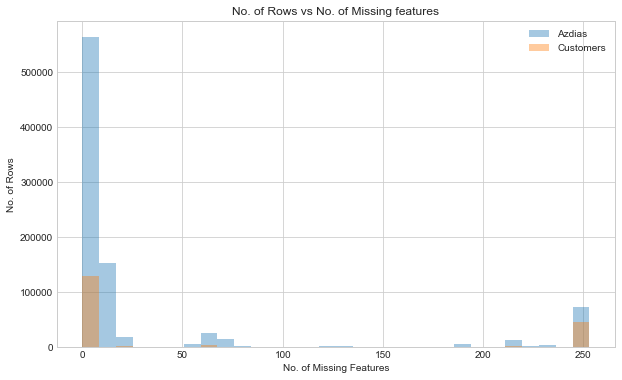

In [95]:
plot_missing_rowwise_histogram(azdias, customers)

### Looking at the graph above we see that

We have 250/355 missing resources on approximately 70,000 lines on Azdias and approximately 50,000 lines on customer data.

Most rows have less than 50 missing values in both dataframes.
Customer data has comparatively more rows with errors than Azdias.

Observing this information and it is prudent to discard the lines with more than 50 missing values

In [96]:

def remove_missing_rows(df, threshold, name=""):
    """
    Takes in a dataframe and drops rows with number of missing features 
    as per given threshold.
    """
    total_rows = df.shape[0]
    
    df = df.dropna(thresh=df.shape[1]-threshold)
    
    removed_rows = total_rows - df.shape[0]
    
    print(f"\t\tRemoved {removed_rows} rows from {name} dataframe")
    
    # Reset index
    df = df.reset_index()
    del df['index']
    
    return df

In [97]:
print("Number of rows Before dropping")
print(f"Azdias - {len(azdias)}")
print(f"Customers - {len(customers)}")

customers = remove_missing_rows(customers, threshold=50)
azdias = remove_missing_rows(azdias, threshold=50)

print("Number of rows After dropping")
print(f"Azdias - {len(azdias)}")
print(f"Customers - {len(customers)}")

Number of rows Before dropping
Azdias - 891221
Customers - 191652
		Removed 57406 rows from  dataframe
		Removed 153933 rows from  dataframe
Number of rows After dropping
Azdias - 737288
Customers - 134246


/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


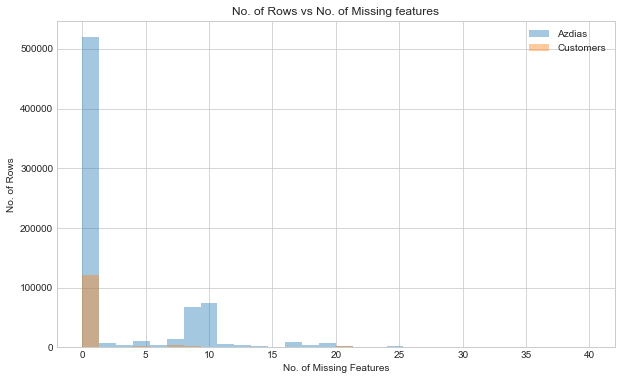

In [98]:
plot_missing_rowwise_histogram(azdias, customers)

The graph above shows the result of the removed lines but can still be observed for some missing values in the range 1 to 50.

We can imput the most common values of the corresponding resources in these lines, since the data represent the population demographics. These values considering the average can help in the realization and complement of the model.


In [99]:
azdias.isnull().sum()

LNR                                 0
AKT_DAT_KL                          0
ALTER_HH                            0
ALTERSKATEGORIE_FEIN           167564
ANZ_HAUSHALTE_AKTIV                 0
ANZ_HH_TITEL                     3325
ANZ_KINDER                          0
ANZ_PERSONEN                        0
ANZ_STATISTISCHE_HAUSHALTE          0
ANZ_TITEL                           0
ARBEIT                           3808
BALLRAUM                          475
CAMEO_DEU_2015                   3056
CAMEO_DEUG_2015                  3340
CAMEO_INTL_2015                  3340
CJT_GESAMTTYP                    4382
CJT_KATALOGNUTZER                4382
CJT_TYP_1                        4382
CJT_TYP_2                        4382
CJT_TYP_3                        4382
CJT_TYP_4                        4382
CJT_TYP_5                        4382
CJT_TYP_6                        4382
D19_BANKEN_ANZ_12                   0
D19_BANKEN_ANZ_24                   0
D19_BANKEN_DATUM                    0
D19_BANKEN_D

In [100]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737288 entries, 0 to 737287
Columns: 356 entries, LNR to Temp
dtypes: float64(266), int64(87), object(3)
memory usage: 2.0+ GB


In [101]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134246 entries, 0 to 134245
Columns: 359 entries, LNR to Temp
dtypes: float64(266), int64(88), object(5)
memory usage: 367.7+ MB


Column types
We can look at df.info () to understand what are the data types of the columns we have.

In [102]:
azdias_object_cols = azdias.columns[azdias.dtypes == "object"]
customer_object_cols = customers.columns[customers.dtypes == "object"]

In [103]:
print("Azdias columns with dtype Object \n",azdias_object_cols.values)
print("Azdias columns with dtype Object \n",customer_object_cols.values)

Azdias columns with dtype Object 
 ['CAMEO_DEU_2015' 'D19_LETZTER_KAUF_BRANCHE' 'OST_WEST_KZ']
Azdias columns with dtype Object 
 ['CAMEO_DEU_2015' 'D19_LETZTER_KAUF_BRANCHE' 'OST_WEST_KZ' 'PRODUCT_GROUP'
 'CUSTOMER_GROUP']


In [104]:
for col in azdias_object_cols:
    print("\nColumn ",col)
    print(azdias[col].value_counts())


Column  CAMEO_DEU_2015
6B    54006
8A    50776
4C    43988
2D    32906
7A    32630
3C    32565
3D    32176
8B    31262
4A    30254
8C    30147
9D    26746
9B    25888
7B    22921
9C    22919
9A    20057
2C    17742
8D    16675
6E    15598
5D    14071
2B    14042
6C    13868
2A    11921
1D    11457
1A    10167
5A     9721
5B     9691
5C     9050
4B     8284
7C     8127
4D     8051
6A     6416
3A     5871
6D     5756
3B     5709
6F     5048
4E     5005
1E     4783
7D     4431
7E     4375
1C     4012
5F     3939
9E     3841
1B     3815
5E     3241
XX      284
Name: CAMEO_DEU_2015, dtype: int64

Column  D19_LETZTER_KAUF_BRANCHE
D19_UNBEKANNT             179081
D19_VERSICHERUNGEN         52220
D19_SONSTIGE               40546
D19_VOLLSORTIMENT          31292
D19_SCHUHE                 28486
D19_BUCH_CD                25643
D19_VERSAND_REST           23398
D19_DROGERIEARTIKEL        21371
D19_BANKEN_DIREKT          20993
D19_BEKLEIDUNG_REST        19147
D19_HAUS_DEKO              18823
D19_

Looking at the analyzes above we have these columns:

OST_WEST_KZ - contains information about the person's history, that is, which part of Germany they belonged to before unification. We can encode values in this column with pd_dummies or a label encoder.
The columns that can be removed:

D19_LETZTER_KAUF_BRANCHE - contains information about the last branch they bought.

CAMEO_DEU_2015 - Gives information about the specific group to which a person belongs.

These columns have a lot of granularity in the information they represent. Can be considered as outliers, This will increase the number of resources for modeling purposes. Therefore, these columns can also be eliminated for simplicity.

In [105]:
remove_extra_cols = ["D19_LETZTER_KAUF_BRANCHE", "CAMEO_DEU_2015", "LP_FAMILIE_FEIN", "LP_STATUS_FEIN"]

azdias = remove_columns(azdias, remove_extra_cols)
customers = remove_columns(customers, remove_extra_cols)

# 0.9 Encoding Categorical Columns

Encoding OST_WEST_KZ column.

In [106]:
def fix_ost_west_col(df):
    """
    Function to label encode the feature "OST_WEST_KZ"
    """
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"W": 0, "O": 1})
    
    return df

In [107]:
azdias = fix_ost_west_col(azdias)
customers = fix_ost_west_col(customers)

Ecoding ANREDE_KZ column.

In [108]:
def fix_anrede_col(df):
    """
    Function to label encode the feature "ANREDE_KZ"
    """
    df["ANREDE_KZ"] = df["ANREDE_KZ"].replace({1: 0, 2: 1})
    
    return df

In [109]:
azdias = fix_anrede_col(azdias)
customers = fix_anrede_col(customers)

#### Encoding of the CAMEO_INTL_2015 column
since it contains two types of information contained in a column. It can be divided into two separate columns.

In [110]:
azdias['CAMEO_INTL_2015'].unique()

array([51., 24., 12., 43., 54., 22., 14., 13., 15., 41., 34., 55., 33.,
       25., nan, 23., 31., 52., 45., 35., 44., 32.])

In [111]:
def fix_cameo_intl_col(df):
    
    df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].apply(lambda x: np.floor_divide(float(x), 10) if float(x) else np.nan)
    df['CAMEO_INTL_2015_FAMILY'] = df['CAMEO_INTL_2015'].apply(lambda x: np.mod(float(x), 10) if float(x) else np.nan)
    
    df.drop("CAMEO_INTL_2015", axis=1, inplace=True)
    return df

In [112]:
azdias = fix_cameo_intl_col(azdias)
customers = fix_cameo_intl_col(customers)

In [113]:
azdias['CAMEO_INTL_2015_FAMILY'].unique()

array([ 1.,  4.,  2.,  3.,  5., nan])

In [114]:
azdias['CAMEO_INTL_2015_WEALTH'].unique()

array([ 5.,  2.,  1.,  4.,  3., nan])

#### Fixing the WOHNLAGE column

The WOHNLAGE column contains the value - 0 for - no calculated score, while all other values represent some score. This value can be replaced by NaN.

In [115]:
azdias.WOHNLAGE.value_counts()

3.0    235402
7.0    161356
4.0    127406
2.0     94544
5.0     67924
1.0     41440
8.0      9199
0.0        17
Name: WOHNLAGE, dtype: int64

In [116]:
def fix_wohnlage_col(df):
    """
    Function to remove '0' from "WOHNLAGE" 
    """
    df["WOHNLAGE"] = df["WOHNLAGE"].replace({0: np.nan})
    
    return df

In [117]:
azdias = fix_wohnlage_col(azdias)
customers = fix_wohnlage_col(customers)

In [118]:
azdias.WOHNLAGE.value_counts(), azdias.WOHNLAGE.isna().sum()

(3.0    235402
 7.0    161356
 4.0    127406
 2.0     94544
 5.0     67924
 1.0     41440
 8.0      9199
 Name: WOHNLAGE, dtype: int64, 17)

Dataframe separate from customers into two parts, that is, remove the extra columns present in the customer data set as a separate dataframe.

In [119]:
customer_extra_cols = customers[extra_cols_in_customers]
customers = customers.drop(extra_cols_in_customers, axis = 1)

In [120]:
customer_extra_cols.head()

,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE
0,COSMETIC_AND_FOOD,MULTI_BUYER,0
1,COSMETIC_AND_FOOD,MULTI_BUYER,0
2,COSMETIC,MULTI_BUYER,0
3,FOOD,MULTI_BUYER,0
4,COSMETIC_AND_FOOD,MULTI_BUYER,0


In [121]:
azdias.shape, customers.shape, customer_extra_cols.shape

((737288, 353), (134246, 353), (134246, 3))

Finally checking the shapes of all the dataframes.

### 0.10 Imputing missing values

Although we have eliminated columns and rows with missing values based on some limit. We still have some columns with missing values. We can now resolve these missing values by filling them with the average of the values or with the most common values.

In this case, imputing missing values with the most common values will make sense, as it is demographic data and the most common values represent the population.

In [122]:
customer_extra_cols.isna().sum()

PRODUCT_GROUP      0
CUSTOMER_GROUP     0
ONLINE_PURCHASE    0
dtype: int64

We will adjust the imputer on the azdias data, since the azdias data represents the entire population and then we will transform the azdias and customers data.

In [123]:
imputer = SimpleImputer(strategy="most_frequent")

azdias = pd.DataFrame(imputer.fit_transform(azdias), columns = azdias.columns)
customers = pd.DataFrame(imputer.transform(customers), columns = customers.columns)

In [124]:
azdias.shape, customers.shape, customer_extra_cols.shape

((737288, 353), (134246, 353), (134246, 3))

## 0.11 Featuring scaling


Finally after clearing the data, we can now scale the data to ensure that all resources have the same range. We will use sklearn's StandardScaler to scale the data.

In [125]:
#azdias, customers, customers_additional, attributes_values, attributes_info = load_avarto_data()

In [126]:
azdias.to_csv('./data/Azdias_cleaned4.csv', index=False)
customers.to_csv('./data/Customers_cleaned4.csv', index=False)
customer_extra_cols.to_csv('./data/Customer_Additional_cleaned4.csv', index=False)
customers_additional.to_csv('./data/Customer_Additional_cleaned.csv', index=False)

The LNR column corresponds to each person's id and not to a characteristic. We can confirm this by examining the unique values in the LNR column and the total number of rows in the data frames

In [127]:
print( len(azdias.LNR.unique()), len(azdias) )
print( len(customers.LNR.unique()), len(customers) )

737288 737288
134246 134246


In [128]:
azdias = azdias.drop("LNR", axis=1)
customers = customers.drop("LNR", axis=1)



## 0.1.6 Introducing scale


After clearing the data, we can now scale the data to ensure that all resources have the same range. We will use sklearn's StandardScaler to scale the data.

In [129]:
scaler = StandardScaler()

scaler.fit(azdias)

azdias = pd.DataFrame(scaler.transform(azdias), columns = azdias.columns)
customers = pd.DataFrame(scaler.transform(customers), columns = customers.columns)

In [130]:
azdias.head()

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,Temp,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_FAMILY
0,1.262251,-1.430675,1.560767,0.186813,-0.125303,-0.299061,0.224688,0.335407,-0.06066,-0.183295,...,1.454873,-0.747722,0.547826,-0.028580,1.141224,0.958448,-1.682098,0.452818,1.167642,-1.247569
1,1.262251,0.801403,0.674377,0.120634,-0.125303,-0.299061,-0.634469,-0.031840,-0.06066,-0.183295,...,0.023979,-0.747722,0.547826,-1.083176,1.141224,0.958448,0.168026,-0.990800,-0.877925,0.764156
2,-0.934331,0.276209,-0.212013,-0.474979,-0.125303,-0.299061,-1.493626,-0.399086,-0.06066,-1.187413,...,1.812596,0.952074,0.547826,1.553315,-0.279664,0.958448,1.093087,-1.151202,-1.559780,-0.576994
3,-0.934331,1.195299,0.009584,-0.342620,-0.125303,-0.299061,1.943002,-0.325637,-0.06066,0.820823,...,-0.691468,-1.314321,0.547826,-0.555878,0.430780,-1.043354,0.168026,1.335028,0.485786,0.093581
4,-0.934331,-0.117688,-0.876806,-0.210262,-0.125303,-0.299061,-0.634469,-0.399086,-0.06066,-1.187413,...,-0.691468,0.952074,0.547826,1.553315,0.430780,0.958448,-1.682098,-0.589795,1.167642,0.764156


In [131]:
customers.head()

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,Temp,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_FAMILY
0,-0.934331,-0.117688,-0.876806,-0.474979,-0.125303,-0.299061,0.224688,-0.472535,-0.06066,-2.191531,...,-1.406915,0.952074,0.547826,1.553315,-0.279664,-1.043354,1.093087,0.372617,-1.559780,0.093581
1,-0.934331,-0.642882,-3.092781,-0.474979,-0.125303,-0.299061,-0.634469,-0.472535,-0.06066,-0.183295,...,1.812596,0.952074,0.547826,-1.083176,-0.279664,0.958448,1.093087,-0.188790,-0.196069,0.764156
2,-0.934331,-0.380285,-1.320001,-0.541158,-0.125303,-0.299061,-1.493626,-0.472535,-0.06066,-2.191531,...,-1.406915,0.952074,0.547826,1.553315,-1.700552,-1.043354,1.093087,-1.151202,-0.877925,0.764156
3,-0.934331,1.195299,0.009584,-0.077904,-0.125303,-0.299061,1.943002,-0.031840,-0.06066,-0.183295,...,-0.691468,-1.314321,0.547826,-0.555878,-1.700552,-1.043354,0.168026,1.254827,0.485786,-1.247569
4,-0.934331,0.013611,-0.876806,-0.474979,-0.125303,-0.299061,0.224688,-0.472535,-0.06066,-0.183295,...,-1.764638,0.952074,0.547826,-1.610474,-0.990108,-1.043354,0.168026,0.132014,-0.196069,0.764156


In [132]:
azdias.to_csv('./data/Azdias_scaled4.csv', index=False)
customers.to_csv('./data/Customers_scaled4.csv', index=False)

In [133]:
azdias.describe()

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,Temp,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_FAMILY
count,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,...,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05,7.372880e+05
mean,-4.291587e-17,3.784728e-18,2.059962e-18,-5.416060e-17,-2.349380e-18,-2.103631e-18,7.440317e-17,8.242859e-19,2.967512e-17,1.606873e-16,...,-8.592329e-17,4.277131e-17,-7.629207e-17,1.343977e-16,1.315123e-16,1.810405e-16,2.037724e-16,2.883163e-17,-7.904892e-17,9.711154e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-9.343305e-01,-1.430675e+00,-3.092781e+00,-5.411578e-01,-1.253032e-01,-2.990606e-01,-1.493626e+00,-5.459847e-01,-6.066049e-02,-2.191531e+00,...,-1.764638e+00,-1.880919e+00,-3.687897e+00,-1.610474e+00,-1.700552e+00,-1.043354e+00,-1.682098e+00,-1.151202e+00,-1.559780e+00,-1.247569e+00
25%,-9.343305e-01,-1.430675e+00,-4.336108e-01,-4.087995e-01,-1.253032e-01,-2.990606e-01,-6.344686e-01,-4.725354e-01,-6.066049e-02,-1.832950e-01,...,-6.914679e-01,-7.477219e-01,1.836032e-02,-5.558778e-01,-2.796640e-01,-1.043354e+00,-7.570360e-01,-8.303977e-01,-8.779246e-01,-1.247569e+00
50%,-3.851852e-01,2.762085e-01,2.311817e-01,-2.764413e-01,-1.253032e-01,-2.990606e-01,-6.344686e-01,-2.521876e-01,-6.066049e-02,-1.832950e-01,...,2.397897e-02,3.854755e-01,5.478257e-01,-5.558778e-01,-2.796640e-01,9.584476e-01,1.680257e-01,-2.689911e-01,4.857862e-01,9.358100e-02
75%,1.262251e+00,8.014033e-01,4.527792e-01,5.445438e-02,-1.253032e-01,-2.990606e-01,2.246884e-01,1.150588e-01,-6.066049e-02,8.208229e-01,...,7.394258e-01,9.520742e-01,5.478257e-01,4.987187e-01,4.307802e-01,9.584476e-01,1.093087e+00,1.014224e+00,1.167642e+00,7.641562e-01
max,1.262251e+00,1.326598e+00,2.447157e+00,3.493086e+01,6.412658e+01,2.221388e+01,3.115434e+01,2.699749e+01,5.855565e+01,5.841413e+00,...,1.812596e+00,9.520742e-01,5.478257e-01,2.080613e+00,1.851669e+00,9.584476e-01,5.718396e+00,1.976636e+00,1.167642e+00,1.434731e+00


In [135]:
customers.describe()

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,Temp,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_FAMILY
count,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,...,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000,134246.000000
mean,-0.741310,0.059928,-0.785376,-0.225569,0.077868,-0.042389,0.473925,-0.216505,0.242036,-0.350070,...,-0.987331,0.037023,0.396278,-0.171699,-0.707605,-0.385640,0.637399,0.601606,-0.471943,0.339940
std,0.524717,0.821809,0.912252,0.907598,1.625892,0.967413,1.202400,0.992885,2.246771,1.015493,...,0.818558,1.054763,0.553291,1.089244,0.925300,0.940230,0.699795,1.067192,0.960546,0.900727
min,-0.934331,-1.430675,-3.092781,-0.541158,-0.125303,-0.299061,-1.493626,-0.545985,-0.060660,-2.191531,...,-1.764638,-1.880919,-3.687897,-1.610474,-1.700552,-1.043354,-1.682098,-1.151202,-1.559780,-1.247569
25%,-0.934331,-0.380285,-1.098403,-0.474979,-0.125303,-0.299061,-0.634469,-0.472535,-0.060660,-1.187413,...,-1.764638,-1.314321,0.547826,-1.083176,-1.700552,-1.043354,0.168026,-0.268991,-1.559780,-0.576994
50%,-0.934331,0.013611,-0.876806,-0.474979,-0.125303,-0.299061,0.224688,-0.472535,-0.060660,-0.183295,...,-1.049191,0.952074,0.547826,-0.555878,-0.279664,-1.043354,1.093087,0.372617,-0.877925,0.764156
75%,-0.934331,0.670105,-0.212013,-0.276441,-0.125303,-0.299061,1.083845,-0.325637,-0.060660,0.820823,...,-0.691468,0.952074,0.547826,0.498719,-0.279664,0.958448,1.093087,1.736033,0.485786,0.764156
max,1.262251,1.326598,2.447157,34.070529,64.126579,16.073987,16.548672,26.997494,73.209732,5.841413,...,1.812596,0.952074,0.547826,2.080613,1.851669,0.958448,5.718396,1.976636,1.167642,1.434731


 ### 1.0 PCA

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.


### 1.1 Dimensionality reduction

As the number of resources in the data is relatively high, we can see the variation explained by each resource in the data set. Using a dimensionality reduction technique, we can effectively reduce the number of features that do not vary much in the data. Since we cannot analyze each resource on its own to decide if the resource is varying, we can use a statistical approach to find out how much variation is explained by each resource. One of these algorithms is Principal Component Analysis (PCA).

In [136]:
pd.set_option("display.max_colwidth", 200)

In [137]:
customers_additional = customer_extra_cols

In [138]:
print (azdias.shape)
print (customers.shape)
print (customers_additional.shape)
print (attributes_values.shape)
print (attributes_info.shape)

(737288, 352)
(134246, 352)
(134246, 3)
(2258, 4)
(313, 4)


In [139]:
def perform_pca(data, n_components=None):
    pca = PCA(n_components, random_state=2) ### 
    pca.fit(data)
    data_transformed = pca.transform(data)
    return pca, data_transformed

In [140]:
azdias.isnull().sum()

AKT_DAT_KL                     0
ALTER_HH                       0
ALTERSKATEGORIE_FEIN           0
ANZ_HAUSHALTE_AKTIV            0
ANZ_HH_TITEL                   0
ANZ_KINDER                     0
ANZ_PERSONEN                   0
ANZ_STATISTISCHE_HAUSHALTE     0
ANZ_TITEL                      0
ARBEIT                         0
BALLRAUM                       0
CAMEO_DEUG_2015                0
CJT_GESAMTTYP                  0
CJT_KATALOGNUTZER              0
CJT_TYP_1                      0
CJT_TYP_2                      0
CJT_TYP_3                      0
CJT_TYP_4                      0
CJT_TYP_5                      0
CJT_TYP_6                      0
D19_BANKEN_ANZ_12              0
D19_BANKEN_ANZ_24              0
D19_BANKEN_DATUM               0
D19_BANKEN_DIREKT              0
D19_BANKEN_GROSS               0
D19_BANKEN_LOKAL               0
D19_BANKEN_OFFLINE_DATUM       0
D19_BANKEN_ONLINE_DATUM        0
D19_BANKEN_ONLINE_QUOTE_12     0
D19_BANKEN_REST                0
D19_BEKLEI

In [141]:
pca_azdias, _ = perform_pca(azdias, None) ## 

In [142]:
pca_azdias

PCA(random_state=2)

In [143]:
def plot_pca_exp_variance(pca_azdias, cumulative=True, figsize=(8,10)):
    """
    Takes in two PCA models (which are fit on corresponding data) and plots 
    their Explained Variance vs Number of components
    
    """   
    
    if cumulative:
        azdias_variance = np.cumsum(pca_azdias.explained_variance_ratio_)
        y_label = "Percentage Explained Variance"
    else:
        azdias_variance = pca_azdias.explained_variance_ratio_
        y_label = "Explained Variance Ratio"
        
    fig = plt.figure(figsize=figsize)

    ax = fig.add_subplot(211)
    ax.plot(azdias_variance)
    ax.set_xlabel("No. of components")
    ax.set_ylabel(y_label)
    ax.set_title("Azdias - PCA Explained Variance Ratio vs Number of Components")
    ax.grid()
    plt.show()

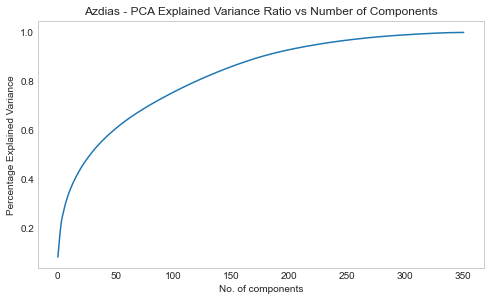

In [144]:
plot_pca_exp_variance(pca_azdias)

From the explained variance graph, it is observed that about 150 components explain 90% of the variance of the data set. We can set the number of components to 150 and perform the PCA analysis to have 150 components. Then, we can see the importance of resources for each component, to understand what each component of the PCA represents.

In [145]:
%%time
pca_150, azdias_pca_150 = perform_pca(azdias, n_components=150)

CPU times: user 2min 52s, sys: 36.9 s, total: 3min 29s
Wall time: 1min 42s


In [146]:
%%time
pca_200, azdias_pca_200 = perform_pca(azdias, n_components=200)

CPU times: user 3min 25s, sys: 44.7 s, total: 4min 10s
Wall time: 1min 53s


### 1.1.1 Interpreting PCA components
Now we can examine the weights of the resources given by the PCA algorithm and understand what each component is composed of. We can write a function to get information about the main positive n resources and the main negative n resources for a given component.

In [147]:
def plot_feature_weights(df, pca, attributes_info, dimension, n_weights = 5, plot=True,figsize=(7,8)):
    """
    This function displays interesting features of the selected dimension
    """
    
    features = df.columns.values
    components = pca.components_
    feature_weights = dict(zip(features, components[dimension]))
    sorted_weights = sorted(feature_weights.items(), key = lambda kv: kv[1])
    
    feat_names = []
    feat_weights = []
    feat_descs = []

    for feature, weight in sorted_weights[-n_weights:]:
        feat_names.append(feature)
        feat_weights.append(weight)
        
    for feature, weight, in sorted_weights[:n_weights]:
        feat_names.append(feature)
        feat_weights.append(weight)
        
    for feature in feat_names:
        if feature in attributes_info.Attribute.values:
            feat_descs.append(attributes_info[attributes_info.Attribute == feature].Description.values[0])
        else:
            feat_descs.append("No description given")
    
    component_info = {"Feature":feat_names, "Description":feat_descs, "FeatureWeight":feat_weights}
    component_info = pd.DataFrame(component_info)
    component_info.sort_values("FeatureWeight", inplace=True, ascending=False, ignore_index=True)
           
    if plot:
        fig = plt.figure(figsize=figsize)

        ax = fig.add_subplot(211)
        ax.bar(feat_names, feat_weights)
        ax.set_ylabel("Feature Weight")
        ax.set_xlabel("Feature Name")
        ax.set_title("PCA Feature weights - Component {}".format(dimension))
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.grid()

        fig.tight_layout()
        plt.show()
    
    return component_info

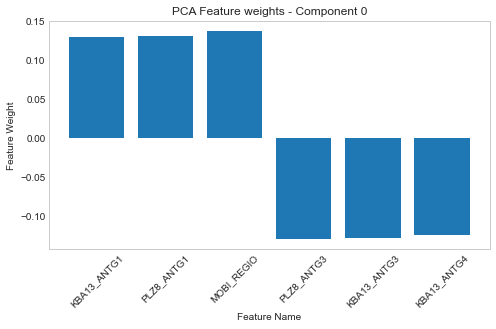

,Feature,Description,FeatureWeight
0,MOBI_REGIO,moving patterns,0.137053
1,PLZ8_ANTG1,number of 1-2 family houses in the PLZ8,0.130411
2,KBA13_ANTG1,No description given,0.129759
3,KBA13_ANTG4,No description given,-0.124765
4,KBA13_ANTG3,No description given,-0.128528
5,PLZ8_ANTG3,number of 6-10 family houses in the PLZ8,-0.129237


In [148]:
component_0_info = plot_feature_weights(azdias, pca_azdias, attributes_info, 0, 3)
component_0_info.head(10)

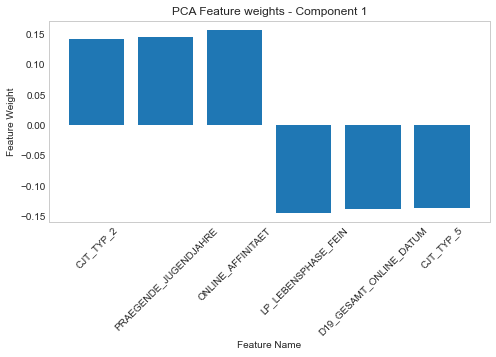

,Feature,Description,FeatureWeight
0,ONLINE_AFFINITAET,online affinity,0.156750
1,PRAEGENDE_JUGENDJAHRE,dominating movement in the person's youth (avantgarde or mainstream),0.145748
2,CJT_TYP_2,No description given,0.142592
3,CJT_TYP_5,No description given,-0.136657
4,D19_GESAMT_ONLINE_DATUM,actuality of the last transaction with the complete file ONLINE,-0.138195
5,LP_LEBENSPHASE_FEIN,lifestage fine,-0.143904


In [149]:
component_1_info = plot_feature_weights(azdias, pca_azdias, attributes_info, 1, 3)
component_1_info.head(10)

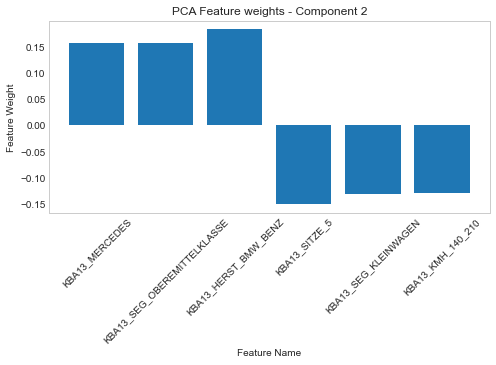

,Feature,Description,FeatureWeight
0,KBA13_HERST_BMW_BENZ,share of BMW & Mercedes Benz within the PLZ8,0.183271
1,KBA13_SEG_OBEREMITTELKLASSE,"share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)",0.158266
2,KBA13_MERCEDES,share of MERCEDES within the PLZ8,0.156829
3,KBA13_KMH_140_210,share of cars with max speed between 140 and 210 km/h within the PLZ8,-0.128896
4,KBA13_SEG_KLEINWAGEN,"share of small and very small cars (Ford Fiesta, Ford Ka etc.) in the PLZ8",-0.131205
5,KBA13_SITZE_5,number of cars with 5 seats in the PLZ8,-0.151114


In [150]:
component_2_info = plot_feature_weights(azdias, pca_azdias, attributes_info, 2, 3)
component_2_info.head(10)

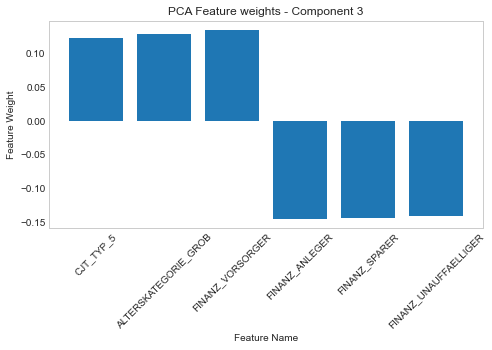

,Feature,Description,FeatureWeight
0,FINANZ_VORSORGER,financial typology: be prepared,0.133352
1,ALTERSKATEGORIE_GROB,age through prename analysis,0.127511
2,CJT_TYP_5,No description given,0.121912
3,FINANZ_UNAUFFAELLIGER,financial typology: unremarkable,-0.140980
4,FINANZ_SPARER,financial typology: money saver,-0.144219
5,FINANZ_ANLEGER,financial typology: investor,-0.144784


In [151]:
component_3_info = plot_feature_weights(azdias, pca_azdias, attributes_info, 3, 3)
component_3_info.head(10)

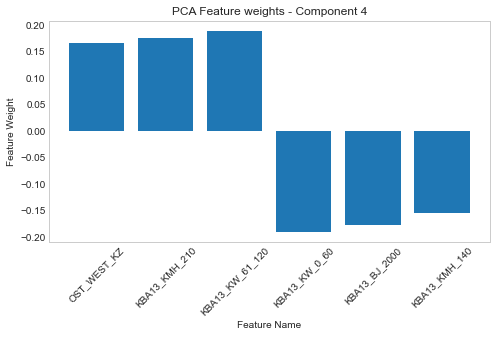

,Feature,Description,FeatureWeight
0,KBA13_KW_61_120,share of cars with an engine power between 61 and 120 KW - PLZ8,0.188235
1,KBA13_KMH_210,No description given,0.175680
2,OST_WEST_KZ,flag indicating the former GDR/FRG,0.165051
3,KBA13_KMH_140,share of cars with max speed between 110 km/h and 140km/h within the PLZ8,-0.154800
4,KBA13_BJ_2000,share of cars built between 2000 and 2003 within the PLZ8,-0.177084
5,KBA13_KW_0_60,share of cars with less than 61 KW engine power - PLZ8,-0.190267


In [152]:
component_4_info = plot_feature_weights(azdias, pca_azdias, attributes_info, 4, 3)
component_4_info.head(10)

### 1.2. Customer segmentation - grouping of K means
After reducing the number of dimensions, we will now use the K-Means Clustering algorithm to group the general population into different segments.

In [153]:
def get_Kmeans_scores(data, K_start, K_end, step=1):
    
    scores = []
    
    print("Performing K-Means clustering")
    print("Given range min:{}, max:{}, step:{}".format(K_start, K_end, step))

    for n in range(K_start, K_end+1, step):
        
        print("\nTraining for n_clusters: ", n)
        start = time.time()
        
        kmeans = KMeans(n)
        #kmeans = KMeans(n, random_state=SEED) ??? SEED
        model = kmeans.fit(data)
        scores.append(abs(model.score(data)))
        
        print("Done! Score: ", scores[-1])
        print("Time elapsed: {:.2f} sec.".format(time.time()-start))
        
    return scores, range(K_start, K_end+1, step)

In [154]:
%%time
scores, range_ = get_Kmeans_scores(azdias_pca_150, 2, 12, 1)

Performing K-Means clustering
Given range min:2, max:12, step:1

Training for n_clusters:  2
Done! Score:  206732652.02445358
Time elapsed: 23.42 sec.

Training for n_clusters:  3
Done! Score:  199014373.09161368
Time elapsed: 30.66 sec.

Training for n_clusters:  4
Done! Score:  194627883.22255313
Time elapsed: 49.76 sec.

Training for n_clusters:  5
Done! Score:  190866638.00954863
Time elapsed: 62.26 sec.

Training for n_clusters:  6
Done! Score:  187973218.4230564
Time elapsed: 67.50 sec.

Training for n_clusters:  7
Done! Score:  185550032.2209155
Time elapsed: 78.81 sec.

Training for n_clusters:  8
Done! Score:  183483958.09398988
Time elapsed: 127.05 sec.

Training for n_clusters:  9
Done! Score:  181714460.64994904
Time elapsed: 94.06 sec.

Training for n_clusters:  10
Done! Score:  180357216.64048356
Time elapsed: 145.08 sec.

Training for n_clusters:  11
Done! Score:  179104891.32931948
Time elapsed: 195.50 sec.

Training for n_clusters:  12
Done! Score:  178007187.08161333


In [155]:
def plot_elbow(scores, range_):
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    
    ax.plot(range_, scores, linestyle= "--",marker = "o", color="orange")
    ax.set_xlabel("No. of Clusters")
    ax.set_ylabel("Sum of squared distances")
    ax.set_title("Kmeans - Cluster distances vs No. of Clusters")
    
    plt.show()

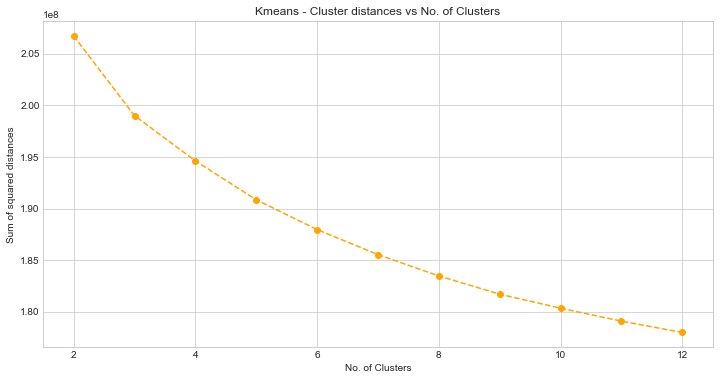

In [156]:

plot_elbow(scores, range_)

### Choosing the number of clusters
The basic idea behind clustering algorithms is to select the number of clusters in order to minimize intracluster variation.

In this process, the elbow method is chosen to select the ideal number of clusters.

From the elbow above, we can see that the sum of the quadratic error decreases with a high slope up to about 8 clusters and then the slope decreases.

In [157]:
kmeans = KMeans(8, random_state=SEED) 
#kmeans = KMeans(8)
kmeans.fit(azdias_pca_150)

KMeans(random_state=2)

In [158]:
azdias_clusters = kmeans.predict(azdias_pca_150)

In [159]:
customers_pca_150 = pca_150.transform(customers)

In [160]:
customers_clusters = kmeans.predict(customers_pca_150)

In [161]:
print(azdias_clusters[:15], "\n",customers_clusters[:15])

[5 5 3 1 3 5 5 4 4 7 5 5 4 6 5] 
 [3 7 3 1 4 0 4 7 0 0 0 7 4 0 0]


In [162]:
customers_clusters = pd.Series(customers_clusters)
azdias_clusters = pd.Series(azdias_clusters)

In [163]:
customers_clusters.value_counts().sort_index()

0    36842
1     4337
2     3421
3    40276
4    29705
5     1313
6     2144
7    16208
dtype: int64

In [164]:
azdias_clusters.value_counts().sort_index()

0    116152
1     64981
2     69700
3    116772
4     69030
5    112541
6     89380
7     98732
dtype: int64

### Number of people in each cluster
The number of people in each cluster can be stored on a dataframe for further analysis.

In [165]:
cluster_info = pd.DataFrame([])

cluster_info["Population"] = azdias_clusters.value_counts().sort_index()
cluster_info["Customers"] = customers_clusters.value_counts().sort_index()
cluster_info.reset_index(inplace=True)
cluster_info.rename(columns={"index":"Cluster"}, inplace=True)

In [166]:
cluster_info

,Cluster,Population,Customers
0,0,116152,36842
1,1,64981,4337
2,2,69700,3421
3,3,116772,40276
4,4,69030,29705
5,5,112541,1313
6,6,89380,2144
7,7,98732,16208


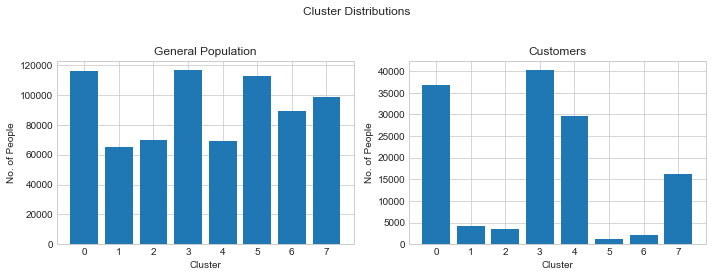

In [167]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))

ax1.bar(cluster_info["Cluster"], cluster_info["Population"])
ax1.set_xlabel("Cluster")
ax1.set_ylabel("No. of People")
ax1.set_title("General Population")

ax2.bar(cluster_info["Cluster"], cluster_info["Customers"])
ax2.set_xlabel("Cluster")
ax2.set_ylabel("No. of People")
ax2.set_title("Customers")

fig.suptitle("Cluster Distributions")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## What percentage of the population under consideration is present in each cluster.

In [168]:
cluster_info["Pop_proportion"] = (cluster_info["Population"]/cluster_info["Population"].sum()*100).round(2)
cluster_info["Cust_proportion"] = (cluster_info["Customers"]/cluster_info["Customers"].sum()*100).round(2)

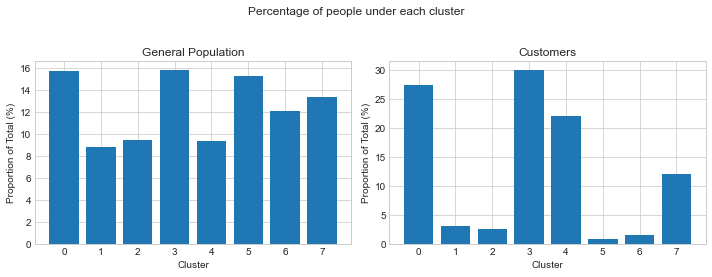

In [169]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))

ax1.bar(cluster_info["Cluster"], cluster_info["Pop_proportion"])
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Proportion of Total (%)")
ax1.set_title("General Population")

ax2.bar(cluster_info["Cluster"], cluster_info["Cust_proportion"])
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Proportion of Total (%)")
ax2.set_title("Customers")

fig.suptitle("Percentage of people under each cluster")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The distribution of the general population is almost uniform (although not perfectly uniform).
Clients are mainly from clusters 0, 3, 4, 7.


## Ratio of proportion of customers to proportion of the general population in each cluster
Proportion of the proportion of customers in relation to the proportion of the general population in each cluster. This gives you an idea of which clusters are the direct mail company's customers and where the company can acquire its new customers. For example, if the ratio of the proportion of customers to the proportion of the population in a cluster is more than one. So, there is more likely to be a chance that the people in that cluster will become future customers.

In [170]:
cluster_info["Cust_over_Pop"] = cluster_info["Cust_proportion"] / cluster_info["Pop_proportion"]

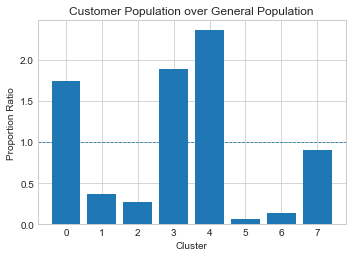

In [171]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))

ax.bar(cluster_info["Cluster"], cluster_info["Cust_over_Pop"])
ax.set_xlabel("Cluster")
ax.set_ylabel("Proportion Ratio")
ax.set_title("Customer Population over General Population")
ax.axhline(y=1, linestyle = "--", linewidth = 0.8)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The ratio> 1 indicates that the cluster contains more customers, and there is a scope of people belonging to those clusters being future customers.

The ratio between the proportions of customers and population gave an idea of the proportion of customers that exist in each cluster.
It also gives you an idea of which cluster can be targeted to future customers.
What does each cluster represent?
To answer this, we can see which pca component most influences a given cluster and then identify which resource influences that pca component. This is done by the following function.

In [172]:
def explain_cluster(kmeans_model, cluster_no, data, pca_model, attributes_info, num_components=2, num_feat_per_comp=3):
    
    weights = kmeans_model.cluster_centers_[cluster_no]
    components = list(range(len(weights)))
    
    cluster_expl = pd.DataFrame({"Weights":weights, "Component":components})
    cluster_expl.sort_values("Weights", ascending=False, inplace=True, ignore_index=True)

    comps = []
    weights = []
    comp_infos = []
    for index, row in cluster_expl.head(n=num_components).iterrows():
        
        component_info = plot_feature_weights(data, pca_model, attributes_info, 
                                                int(row["Component"]), num_feat_per_comp, False)
        comp_infos.append(component_info)
        comps += [int(row["Component"])] * len(component_info)
        weights +=  [row["Weights"]] * len(component_info)
        
    component_info = pd.concat(comp_infos, ignore_index=True)
    component_info.insert(0, "ComponentWeight", pd.Series(weights))
    component_info.insert(0, "Component", pd.Series(comps))
        
    return component_info

In [173]:
cluster_0 = explain_cluster(kmeans, 0, azdias, pca_150, attributes_info)
cluster_0

,Component,ComponentWeight,Feature,Description,FeatureWeight
0,0,7.619436,MOBI_REGIO,moving patterns,0.137053
1,0,7.619436,PLZ8_ANTG1,number of 1-2 family houses in the PLZ8,0.130411
2,0,7.619436,KBA13_ANTG1,No description given,0.129759
3,0,7.619436,KBA13_ANTG4,No description given,-0.124765
4,0,7.619436,KBA13_ANTG3,No description given,-0.128528
5,0,7.619436,PLZ8_ANTG3,number of 6-10 family houses in the PLZ8,-0.129237
6,1,3.420076,ONLINE_AFFINITAET,online affinity,0.156750
7,1,3.420076,PRAEGENDE_JUGENDJAHRE,dominating movement in the person's youth (avantgarde or mainstream),0.145748
8,1,3.420076,CJT_TYP_2,No description given,0.142592
9,1,3.420076,CJT_TYP_5,No description given,-0.136657


In [174]:
cluster_3 = explain_cluster(kmeans, 3, azdias, pca_150, attributes_info)
cluster_3

,Component,ComponentWeight,Feature,Description,FeatureWeight
0,0,3.698259,MOBI_REGIO,moving patterns,0.137053
1,0,3.698259,PLZ8_ANTG1,number of 1-2 family houses in the PLZ8,0.130411
2,0,3.698259,KBA13_ANTG1,No description given,0.129759
3,0,3.698259,KBA13_ANTG4,No description given,-0.124765
4,0,3.698259,KBA13_ANTG3,No description given,-0.128528
5,0,3.698259,PLZ8_ANTG3,number of 6-10 family houses in the PLZ8,-0.129237
6,9,0.439477,KBA13_ALTERHALTER_45,share of car owners between 31 and 45 within the PLZ8,0.165154
7,9,0.439477,KBA13_HALTER_40,share of car owners between 36 and 40 within the PLZ8,0.161650
8,9,0.439477,KBA13_KMH_140_210,share of cars with max speed between 140 and 210 km/h within the PLZ8,0.160807
9,9,0.439477,KBA13_HHZ,No description given,-0.151189


In [175]:
cluster_4 = explain_cluster(kmeans, 4, azdias, pca_150, attributes_info)
cluster_4

,Component,ComponentWeight,Feature,Description,FeatureWeight
0,2,6.261955,KBA13_HERST_BMW_BENZ,share of BMW & Mercedes Benz within the PLZ8,0.183271
1,2,6.261955,KBA13_SEG_OBEREMITTELKLASSE,"share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)",0.158266
2,2,6.261955,KBA13_MERCEDES,share of MERCEDES within the PLZ8,0.156829
3,2,6.261955,KBA13_KMH_140_210,share of cars with max speed between 140 and 210 km/h within the PLZ8,-0.128896
4,2,6.261955,KBA13_SEG_KLEINWAGEN,"share of small and very small cars (Ford Fiesta, Ford Ka etc.) in the PLZ8",-0.131205
5,2,6.261955,KBA13_SITZE_5,number of cars with 5 seats in the PLZ8,-0.151114
6,0,1.761260,MOBI_REGIO,moving patterns,0.137053
7,0,1.761260,PLZ8_ANTG1,number of 1-2 family houses in the PLZ8,0.130411
8,0,1.761260,KBA13_ANTG1,No description given,0.129759
9,0,1.761260,KBA13_ANTG4,No description given,-0.124765


In [176]:
cluster_7 = explain_cluster(kmeans, 7, azdias, pca_150, attributes_info)
cluster_7

,Component,ComponentWeight,Feature,Description,FeatureWeight
0,3,2.198782,FINANZ_VORSORGER,financial typology: be prepared,0.133352
1,3,2.198782,ALTERSKATEGORIE_GROB,age through prename analysis,0.127511
2,3,2.198782,CJT_TYP_5,No description given,0.121912
3,3,2.198782,FINANZ_UNAUFFAELLIGER,financial typology: unremarkable,-0.140980
4,3,2.198782,FINANZ_SPARER,financial typology: money saver,-0.144219
5,3,2.198782,FINANZ_ANLEGER,financial typology: investor,-0.144784
6,8,1.207476,KBA13_ALTERHALTER_61,share of car owners elder than 60 within the PLZ8,0.171870
7,8,1.207476,KBA13_HALTER_65,share of car owners between 61 and 65 within the PLZ8,0.159775
8,8,1.207476,KBA13_HALTER_66,share of car owners over 66 within the PLZ8,0.157783
9,8,1.207476,KBA13_ALTERHALTER_45,share of car owners between 31 and 45 within the PLZ8,-0.137425


## Part 2: Model

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.



In [177]:
mailout_train.shape

(42962, 367)

In [178]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


0    42430
1      532
Name: RESPONSE, dtype: int64


/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RESPONSE', ylabel='count'>

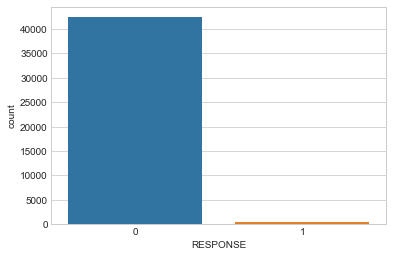

In [179]:

print(mailout_train.RESPONSE.value_counts())
sns.countplot("RESPONSE", data=mailout_train)

In [180]:
def clean_data_for_supervised(cleaned_azdias, df, attributes_values):
    
    print("Cleaning Given Dataframe")
    
    start = time.time()
    
    # Forward fill attribute_values dataframe, to access required columns and corresponding info
    attributes_values["Attribute"] = attributes_values["Attribute"].ffill()
    
    # Fixing columns 18 and 19
    print("\tFixing 18, 19 columns")
    warning_cols = list(df.columns[18:20])
        
    # Ignore if these cols are already cleaned 
    if not (df[warning_cols[0]].dtype == 'float64') & (df[warning_cols[1]].dtype == 'float64'):
        df = fix_cameo_cols(df)
        
        
    print("\tFixing LP_* columns")
    df = fix_LP_cols(df)
    
    print("\tFixing EINGEFUGT column")
    df = fix_eigefugt_col(df)
    
    # Replacing "Unkown" values with "np.nan"
    print("\tReplacing 'unkown' values with 'NaN'")
    unkown_attributes_values = attributes_values[attributes_values["Meaning"] == "unknown"]
    
    df = replace_unkowns(df, unkown_attributes_values, verbose=False)
    
    # Encoding OST_WEST_KZ col
    print("\tEncoding OST_WEST_KZ column")
    df = fix_ost_west_col(df)

    print("\tEncoding ANREDE Column")
    df = fix_anrede_col(df)
    
    print("\tEncoding CAMEO_INT column")
    df = fix_cameo_intl_col(df)
    
    print("\tEncoding WOHNLAGE column")
    df = fix_wohnlage_col(df)
    
    
    # Dropping columns which are not in azdias
    print("\tDropping extra columns")
    cols_to_drop = [col for col in df.columns if col not in azdias.columns]
#     cols_to_drop += ["EINGEFUEGT_AM", "D19_LETZTER_KAUF_BRANCHE", "CAMEO_DEU_2015"]
    
    df = remove_columns(df, cols_to_drop)
    
    
    # Imputing Missing data
    print("\tImputing missing values with most frequent ones")
    imputer = SimpleImputer(strategy="most_frequent")
    
    imputer.fit(azdias)
    df = pd.DataFrame(imputer.transform(df), columns = df.columns)
    
    end = time.time()
    
    print(f"Completed Cleaning in {end-start} seconds")
    
    return df

In [181]:
labels = mailout_train["RESPONSE"]
mailout_train_LNR = mailout_train["LNR"]

In [182]:
mailout_train = clean_data_for_supervised(azdias, mailout_train, attributes_values)

Cleaning Given Dataframe
	Fixing 18, 19 columns
	Fixing LP_* columns
	Fixing EINGEFUGT column
	Replacing 'unkown' values with 'NaN'
	Encoding OST_WEST_KZ column
	Encoding ANREDE Column
	Encoding CAMEO_INT column
	Encoding WOHNLAGE column
	Dropping extra columns
	Imputing missing values with most frequent ones
Completed Cleaning in 24.843459844589233 seconds


In [183]:
mailout_train.shape

(42962, 352)

In [184]:
azdias.shape

(737288, 352)

### 2.2 Applyng model Benchmark 

In [185]:
#!pip install xgboost

In [186]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb


from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


# magic word for producing visualizations in notebook
%matplotlib inline

# For displaying max number of lines
pd.set_option("display.max_rows", 500)

# For reproducability
SEED = 2

In [187]:
X_train, X_val, y_train, y_val = train_test_split(mailout_train, labels, stratify=labels, test_size=0.2)

In [188]:
lr = LogisticRegression(random_state=SEED)

In [189]:
lr.fit(X_train, y_train)


/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=2)

In [190]:
pred = lr.predict_proba(X_val)[:,1]

In [191]:
pred

array([0.01629608, 0.02007698, 0.00835324, ..., 0.03111054, 0.00408694,
       0.01482716])

## Result benchmark


In [192]:
print("Baseline AUROC - ", roc_auc_score(y_val, pred))

Baseline AUROC -  0.6769598787046115


In [193]:
scaler = StandardScaler()

mailout_train = pd.DataFrame(scaler.fit_transform(mailout_train), columns = mailout_train.columns)

In [194]:
X_train, X_val, y_train, y_val = train_test_split(mailout_train, labels, stratify=labels, test_size=0.2, random_state=SEED)

In [195]:
def train_and_predict(model, X_train, y_train, X_test, y_test):
    """
    Fit a model on X_train, y_train
    predicts on X_text, y_test 
    Calculate AUROC on predictions made on test data
    
    Outputs - AUROC score, time elapse for training and prediction    
    """
    start = time.time()
    model = model.fit(X_train, y_train)
    
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    end = time.time()
    time_elapsed = end - start
    
    return roc_score, time_elapsed

In [196]:

models = [("LogisticRegression", LogisticRegression(random_state=SEED)),
         ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=SEED)),
         ("RandomForestClassifier", RandomForestClassifier(random_state=SEED)),
         ("GradientBoostingClassifier", GradientBoostingClassifier(random_state=SEED)),
         ("AdaBoostClassifier", AdaBoostClassifier(random_state=SEED)),
         ("XGBClassifier",xgb.XGBClassifier(random_state=SEED))]

In [197]:
results = {"Model":[],
          "AUCROC_score":[],
          "Time_in_sec":[]}

for name, model in models:
    roc, time_ = train_and_predict(model, X_train, y_train, X_val, y_val)
    results["Model"].append(name)
    results["AUCROC_score"].append(roc)
    results["Time_in_sec"].append(time_)

/Users/vagner.antonio.silva/.julia/conda/3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [198]:
results = pd.DataFrame.from_dict(results, orient='index').transpose()
results

,Model,AUCROC_score,Time_in_sec
0,LogisticRegression,0.63506,1.58742
1,DecisionTreeClassifier,0.516213,2.24661
2,RandomForestClassifier,0.648505,9.1643
3,GradientBoostingClassifier,0.743098,48.6541
4,AdaBoostClassifier,0.699131,11.0993
5,XGBClassifier,0.686636,19.7396


### Evaluating Model Performance
Since there is a large output class imbalance, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the model will be using ROC-AUC to evaluate performance.

The most widely-used measure is the area under the curve (AUC). The AUC can be used to compare the performance of two or more classifiers. A single threshold can be selected and the classifiers' performance at that point compared, or the overall performance can be compared by considering the AUC ". Compared to the F1 score, the ROC does not require optimizing a threshold for each label.

Jason Brownlee, in his article (https://machinelearningmastery.com/assessing-comparing-classifier-performance-roc-curves-2/) explains that "ROC curves give us the ability to assess the performance of the classifier over its entire operating range.

In [199]:
mailout_train_reduced = pca_150.transform(mailout_train)
X_train_red, X_val_red, y_train_red, y_val_red = train_test_split(mailout_train_reduced, labels,
                                                                  stratify=labels, test_size=0.2, random_state=SEED)

In [200]:
models = [("LogisticRegression", LogisticRegression(random_state=SEED)),
         ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=SEED)),
         ("RandomForestClassifier", RandomForestClassifier(random_state=SEED)),
         ("GradientBoostingClassifier", GradientBoostingClassifier(random_state=SEED)),
         ("AdaBoostClassifier", AdaBoostClassifier(random_state=SEED)),
         ("XGBClassifier",xgb.XGBClassifier(random_state=SEED))]

results_reduced = {"Model":[],
          "AUCROC_score":[],
          "Time_in_sec":[]}

for name, model in models:
    roc, time_ = train_and_predict(model, X_train_red, y_train_red, X_val_red, y_val_red)
    results_reduced["Model"].append(name)
    results_reduced["AUCROC_score"].append(roc)
    results_reduced["Time_in_sec"].append(time_)
    
results_reduced = pd.DataFrame.from_dict(results_reduced, orient='index').transpose()
results_reduced

,Model,AUCROC_score,Time_in_sec
0,LogisticRegression,0.620155,0.524434
1,DecisionTreeClassifier,0.490721,29.0431
2,RandomForestClassifier,0.531418,92.4596
3,GradientBoostingClassifier,0.585942,176.019
4,AdaBoostClassifier,0.56128,39.021
5,XGBClassifier,0.54228,24.6105


In [201]:
param_grid = {"n_estimators": [50,100,150,200],
              "learning_rate": [0.01,0.1,0.5,0.9,1.],
              "algorithm":["SAMME.R"]
              }

adaboost_grid = GridSearchCV(estimator = AdaBoostClassifier(random_state=SEED), 
                           param_grid = param_grid, 
                           scoring = "roc_auc", 
                           cv = 5, n_jobs = -1, verbose=2)

In [202]:
%%time
adaboost_grid.fit(X_train, y_train)

best_adaboost = adaboost_grid.best_estimator_

print("Best Score: ", adaboost_grid.best_score_)
print("Best Params: ", adaboost_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.9min finished


Best Score:  0.7729822723526281
Best Params:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
CPU times: user 27.3 s, sys: 1.72 s, total: 29.1 s
Wall time: 15min 21s


In [203]:
preds_adaboost = best_adaboost.predict_proba(X_val)[:,1]
roc_auc_score(y_val, preds_adaboost)


0.7430759808008252

In [ ]:
#print(`ROC score on validation data: {:.4f}`.format(roc_auc_score(y_val, preds_adaboost))

In [204]:
def plot_feature_importances(model, model_name, feature_names, num_features=10):
    """
    Plots top n feature importances for the given model
    """

    
    feature_importance_values= np.zeros((len(model.feature_importances_)))
    
    feature_importance_values += model.feature_importances_

    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # sort based on importance
    feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

    # normalize the feature importances to add up to one
    feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
    feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])
    
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    
    ax.barh(list(reversed(list(feature_importances.index[:num_features]))), 
                feature_importances['normalized_importance'][:num_features], 
                align = 'center')

    # Set ticks and labels
    ax.set_yticks(list(reversed(list(feature_importances.index[:num_features]))))
    ax.set_yticklabels(feature_importances['feature'][:num_features])
    ax.set_xlabel('Normalized Importance')
    ax.set_title(f'Feature Importances ({model_name})')

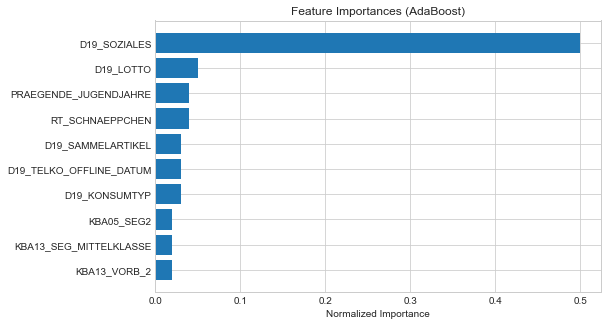

In [205]:
plot_feature_importances(model=best_adaboost, model_name="AdaBoost", feature_names=mailout_train.columns)

In [206]:
xgb_param_grid = {
                "max_depth": [5,10,20,30],
                "learning_rate": [0.01,0.1,0.5,0.9,1.],
                "gamma":[0.1,0.5,1.0],
                "n_estimators":[50,100,150,200]
              }

xgb_grid = GridSearchCV(
        estimator = xgb.XGBClassifier(
                                        objective="binary:logistic", 
                                        n_jobs=-1, 
                                        eval_metric="auc",
                                        silent=0,
                                        random_state=SEED
                                      ), 
        param_grid = xgb_param_grid, 
        scoring = "roc_auc",
        cv = 5, # cros validation
        n_jobs = -1, 
        verbose=2
        )

In [207]:
%%time
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 75.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 169.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 346.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 535.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 631.1min finished


[05:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 1min 41s, sys: 2.35 s, total: 1min 43s
Wall time: 10h 32min 38s


In [208]:
print("Best Score: ", xgb_grid.best_score_)
print("Best Params: ", xgb_grid.best_params_)

Best Score:  0.7772847862137995
Best Params:  {'gamma': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [209]:
preds_xgb = best_xgb.predict_proba(X_val)[:,1]
roc_auc_score(y_val, preds_xgb)
#print("ROC score on validation data: {:.4f}".format(roc_auc_score(y_val, preds_xgb)))

0.7477896271989791

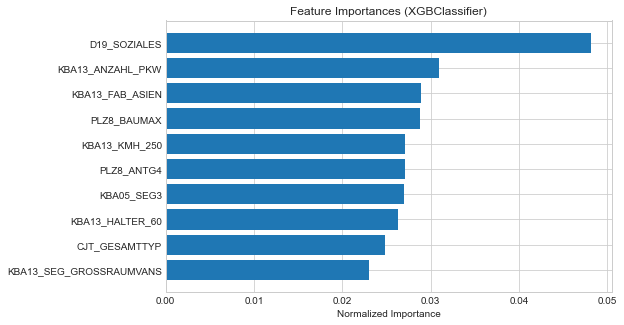

In [210]:
plot_feature_importances(model=best_xgb, model_name="XGBClassifier", feature_names=mailout_train.columns)

In [211]:
mailout_test_LNR = mailout_test["LNR"]
mailout_test = clean_data_for_supervised(azdias, mailout_test, attributes_values)
mailout_test = pd.DataFrame(scaler.transform(mailout_test), columns = mailout_test.columns)

Cleaning Given Dataframe
	Fixing 18, 19 columns
	Fixing LP_* columns
	Fixing EINGEFUGT column
	Replacing 'unkown' values with 'NaN'
	Encoding OST_WEST_KZ column
	Encoding ANREDE Column
	Encoding CAMEO_INT column
	Encoding WOHNLAGE column
	Dropping extra columns
	Imputing missing values with most frequent ones
Completed Cleaning in 22.279335975646973 seconds


In [212]:
best_adaboost.fit(mailout_train, labels)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=2)

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [213]:
preds_test_adaboost = best_adaboost.predict_proba(mailout_test)[:,1]

In [214]:
kaggle_adaboost = pd.DataFrame(index=mailout_test_LNR, data=preds_test_adaboost)
kaggle_adaboost.rename(columns={0: "RESPONSE"}, inplace=True)

In [215]:
kaggle_adaboost.head()

,RESPONSE
LNR,
1754,0.416892
1770,0.416078
1465,0.367276
1470,0.368871
1478,0.368789


In [217]:
kaggle_adaboost.to_csv("./data/submission4.csv")

In [221]:
roc_auc_score(y_val, preds_xgb)

0.7477896271989791